## EDA Macro steps

1) Select a large Data set

2) Perform Data preparation & Cleaning using Pandas and Numpy

3) Perform Exploratory analysis & Visualization in matplotlib using matplotlib and Seaborn

4) Ask and answer questions about the data

5) Summarize your inference and write a conclusion

6) Document, publish and present your Jupyter Notebook


In [4]:
# Python Project Template

# 1. Prepare Problem
    # a) Load libraries
    # b) Load dataset
# 2. Summarize Data
    # a) Descriptive statistics
    # b) Data visualizations
# 3. Prepare Data
    # a) Data Cleaning
    # b) Feature Selection
    # c) Data Transforms
# 4. Evaluate Algorithms
    # a) Split-out validation dataset
    # b) Test options and evaluation metric
    # c) Spot Check Algorithms
    # d) Compare Algorithms
# 5. Improve Accuracy
    # a) Algorithm Tuning
    # b) Ensembles
# 6. Finalize Model
    # a) Predictions on validation dataset
    # b) Create standalone model on entire training dataset
    # c) Save model for later use


# Exploratory data analysis

## Objectif :

- Understand data as much as possible

- Develop a forst strategy of modeling


# Checklist :

## I) 1st level analysis

#### 1) Analysis of the form

- **Identify target variable** : targets
- **Shape of data** : (20468, 114)
- **Type of variables** : 
    113 are "int64" type (including target variable)
    1 unique variable having type float
    - Il n'y a que des valeurs numériques
    - Il y a certaines colonnes qui ont 1 comme maximum. Correspondent-elles à des valeurs binaires aussi ? Comment elles sont corrélées à la variable target ?
    - Which column corresponds to the amount of the transaction ? Column 67 seems to be the only float column, that might be the amount of the transaction
        *) At second thought it seems that col_67 might not be the transaction amount, since it can take zero values for faudulant transactions (which is absurd, since a fraudulent transaction cannot have a zero amount, otherwise it is not fraud)
        *) the other colum that take no zero value for target =1 is col_A, it might be the transaction amount (but it is not float)
    - Which column corresponds to the date ? 
    - Plusieurs colonnes contiennent que des valeurs nulles. Les supprimer ? 

- **Outliers** : winsorization (clipping numeric values between 1s percentile and 99th) (especially for linear models)

def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(dataset[column], 25)
        # 3st quartile
        Q3 = np.percentile(dataset[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = dataset[(dataset[column] < Q1 - outlier_step)
                              | (dataset[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers
    
    
- **Missing values**
- **Duplicates values**:
    *) Columns
    *) and rows :
        - Check if some rows are duplicated between test and train set
        - 
        
- Data shuffling


#### 2) Analysis of the substance 

- **Univariate analysis**: involves analyzing one feature, such as summarizing and finding the feature patterns.
        *) Target variable :  
            - Distrubtion : 26% of fraudulent transactions 
            - visualization
        *) Other variables : 
            - What is their distribution ? 
            - Any variables more important than others ? (significance ) 
            - Any way to cluster / group them ?  
            - Any special variable requiring particular attention ? 

Ways to do bivariate analysis : 

Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot



## II) 2nd level analysis


- **Bivariate analysis / multivariate analysis** : echnique shows the relationship between two or more features using cross-tabulation or statistics.
        *) Relationship between target Versus other variables : 
            - How they relate ? (crosstab, heatmap, correlation..)
            - Any variable / group variable requiring a deeper bivariate analysis with target ?
            - Visualization
            
        *) Relationship between variables and other variables :
        
## III) Preprocessing 

### 1) Numeric values :


- Rankdata 
- aggregate data from day to week
- Log transformation / square root transformation of some features (for non tree based algos )
- Scaling / Normalizing

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### 1) Categorical and Ordinal features :

Ordinal : 

- Label encoding (alphabetical order (labelencoder() or order of appearance (factorize))
- Frequency enconding : encode by the frequency (you can use rankdata to deal with ties )

Categorical : One hot encoding + feature generation (concatenate two cat variables )

==> Label encoding and frequency are often used for tree-based models

    for c in train.columns[df.dtypes == 'objet'] :
        x[c] = x[c].factorize()[0]
==> Onehotencoding is used for non tree based methods


### 3) Date time :
    - Time moments in a period 
        *) day number in a week, month, year, second, minute, hour
        
    - Time since a particular event:
        *) row independant moment (ime since a fixed date )
        *) row dependant: time passed / nummber of days since last

## Feature Generation 

Examples : 

Price and area ==> new feature : price per m²
Vertical distance, horizontal distance ==> combined distance (hypotenuse)
price ==> take the fractional part (can be a good feature for consumer behavior / people's perception of the prices)
- If some variables have relationship or can be grouped, it's a good idea to create a feature with all of them

Date and time : 
- time since last purchase
- last call date
- 

In [1]:
# Import all relevant libraries

import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold,SelectKBest, chi2, SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import f1_score,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.reset_option('^display.', silent=True)
#pd.set_option('display.max_rows', None)

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [2]:
# Data collection

df = pd.DataFrame(pd.read_csv('fraud_detection_bank_dataset.csv'))
df.head()


,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


# I) 1st level analysis

## Analysis of the format

### Identify target & shape of data

In [5]:
df.shape

(20468, 114)

## Type of variables

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 114 columns):
 #    Column      Dtype  
---   ------      -----  
 0    Unnamed: 0  int64  
 1    col_0       int64  
 2    col_1       int64  
 3    col_2       int64  
 4    col_3       int64  
 5    col_4       int64  
 6    col_5       int64  
 7    col_6       int64  
 8    col_7       int64  
 9    col_8       int64  
 10   col_9       int64  
 11   col_10      int64  
 12   col_11      int64  
 13   col_12      int64  
 14   col_13      int64  
 15   col_14      int64  
 16   col_15      int64  
 17   col_16      int64  
 18   col_17      int64  
 19   col_18      int64  
 20   col_19      int64  
 21   col_20      int64  
 22   col_21      int64  
 23   col_22      int64  
 24   col_23      int64  
 25   col_24      int64  
 26   col_25      int64  
 27   col_26      int64  
 28   col_27      int64  
 29   col_28      int64  
 30   col_29      int64  
 31   col_30      int64  
 32   

In [16]:
# If we had to change type of any field

# df[col] = df[col].astype(float)

In [6]:
# Change display options : display all rows and columns 

pd.set_option('display.max_columns',None)
stats = df.describe(include = 'all')



In [7]:
#pip install opendatasets --upgrade

In [5]:
# How many unique values for each variable

count_unique = []
for col in df.columns :
    #print  (col, len(df[col].unique()))
    count_unique.append((col,len(df[col].unique())))

sorted(count_unique)

[('Unnamed: 0', 20468),
 ('col_0', 142),
 ('col_1', 1920),
 ('col_10', 1),
 ('col_100', 2),
 ('col_101', 2),
 ('col_102', 9),
 ('col_103', 3),
 ('col_104', 2),
 ('col_105', 2),
 ('col_106', 2),
 ('col_107', 2),
 ('col_108', 2),
 ('col_109', 2),
 ('col_11', 1),
 ('col_110', 13),
 ('col_111', 381),
 ('col_12', 1),
 ('col_13', 2),
 ('col_14', 2),
 ('col_15', 2),
 ('col_16', 2),
 ('col_17', 617),
 ('col_18', 1),
 ('col_19', 1),
 ('col_2', 53),
 ('col_20', 1),
 ('col_21', 1),
 ('col_22', 167),
 ('col_23', 552),
 ('col_24', 132),
 ('col_25', 152),
 ('col_26', 77),
 ('col_27', 11),
 ('col_28', 2),
 ('col_29', 39),
 ('col_3', 115),
 ('col_30', 211),
 ('col_31', 33),
 ('col_32', 75),
 ('col_33', 8),
 ('col_34', 166),
 ('col_35', 1),
 ('col_36', 346),
 ('col_37', 152),
 ('col_38', 1575),
 ('col_39', 6),
 ('col_4', 22),
 ('col_40', 9),
 ('col_41', 62),
 ('col_42', 240),
 ('col_43', 46),
 ('col_44', 78),
 ('col_45', 23),
 ('col_46', 19),
 ('col_47', 441),
 ('col_48', 157),
 ('col_49', 503),
 ('col

In [8]:
# Describe the unique float variable
df.col_67.describe()

count    2.046800e+04
mean     3.680821e+04
std      3.750082e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.162744e+04
max      2.492656e+07
Name: col_67, dtype: float64

## Missing values

<AxesSubplot:>

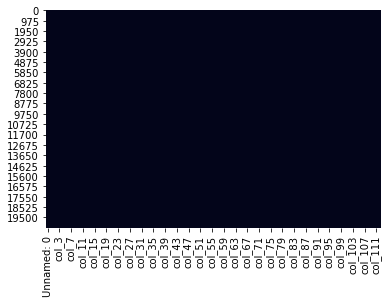

In [44]:
df.isnull().sum().sort_values() #there are no missing values
sns.heatmap(df.isna(), cbar=False)


In [89]:
#df.isnull().values.any()

False

In [ ]:
# if we had to replace some unformatted values with missing values

#df[col] = df[col].replace(to_replace = 'dummy', value = np.nan, inplace = True)



**There are no missing values**

In [10]:
#pd.reset_option('^display.', silent=True)

## Duplicates values

In [8]:
df[df.duplicated() == True] # No duplicates

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets


**No duplicated values.** 

# Analysis of the content

## Univariate analysis

### Target variable

In [9]:
# Target variable
df.targets.value_counts(normalize = True)
# df.targets.value_counts()[1] / df.shape[0] 

0    0.734317
1    0.265683
Name: targets, dtype: float64

In [15]:
# Let's separate data between fraudulent transactions and non fraudulent transactions

fraud = df[df.targets == 1]
non_fraud = df[df.targets == 0]

### Other variables

#### Focus on col_67

<AxesSubplot:xlabel='col_67', ylabel='Count'>

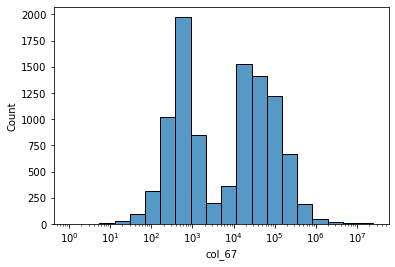

In [11]:

df[df['col_67'] != 0]['col_67'], np.log(df[df['col_67'] != 0]['col_67'])

#sns.distplot(np.log(df['col_67']))

# Let's visualize the only float variable : col_67

plt.figure()
#sns.distplot(df[df['col_67'] != 0].col_67, bins = 20, log_scale=True )
sns.histplot(df[df['col_67'] != 0]['col_67'], bins = 20, log_scale=True )
#sns.histplot(df['col_1'], bins = 20, log_scale = True)

#### The rest of variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function f

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


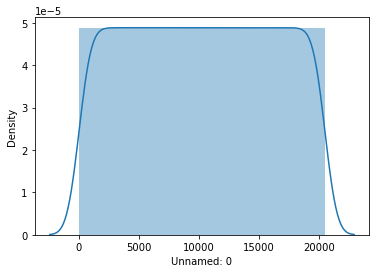

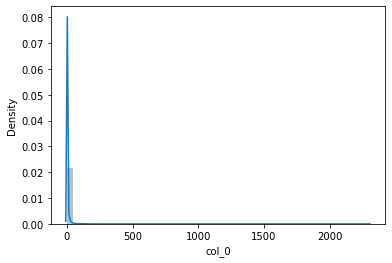

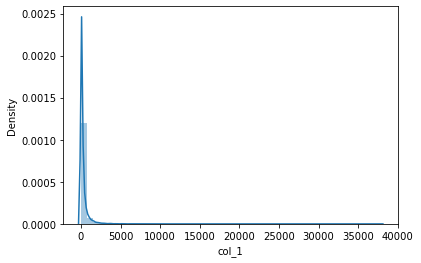

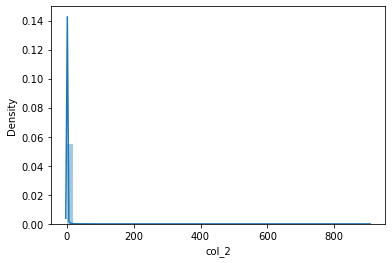

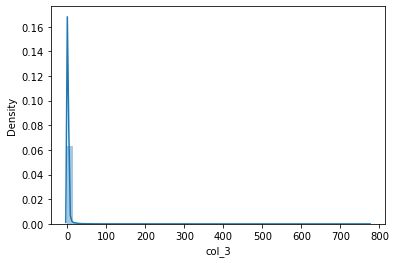

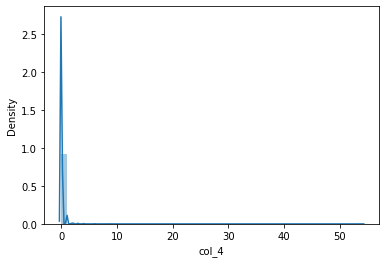

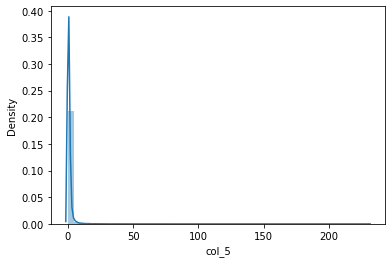

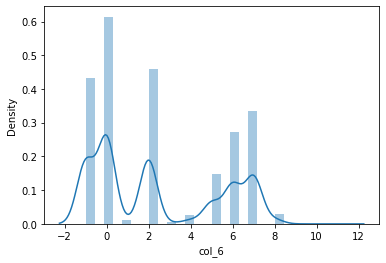

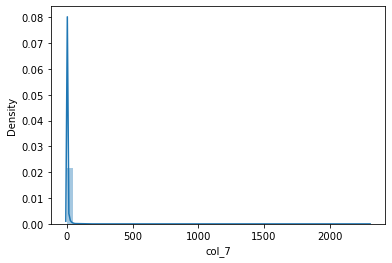

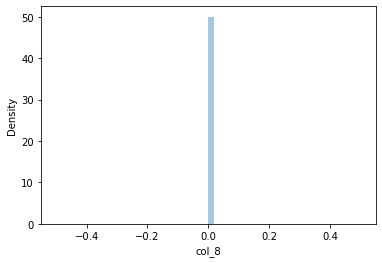

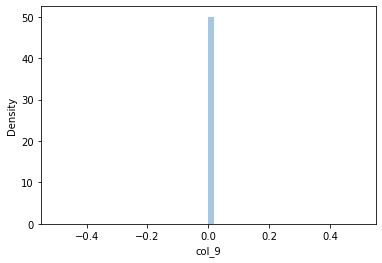

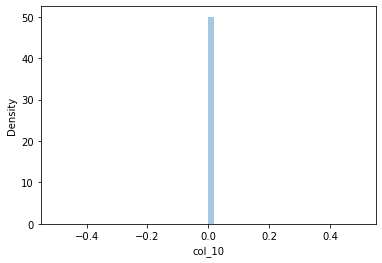

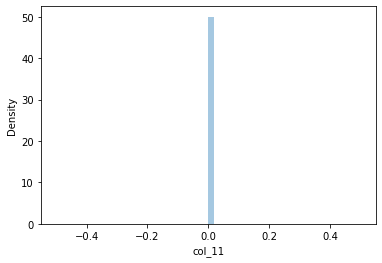

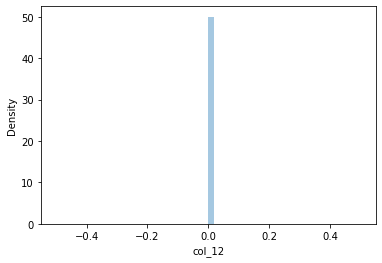

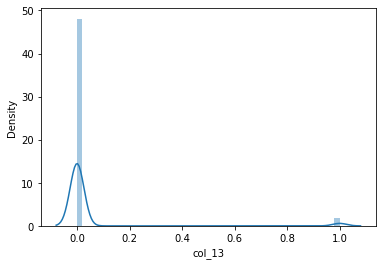

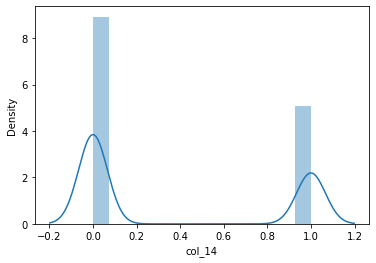

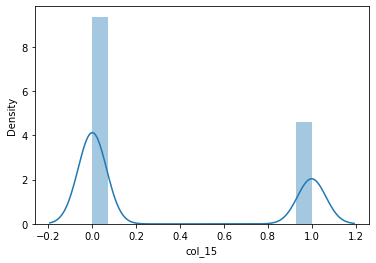

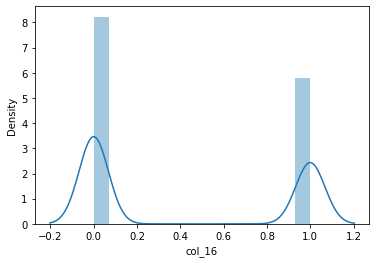

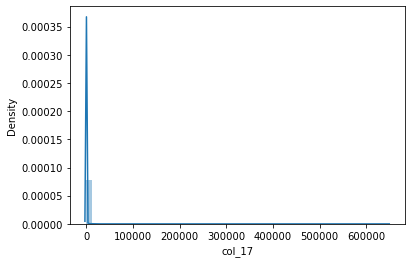

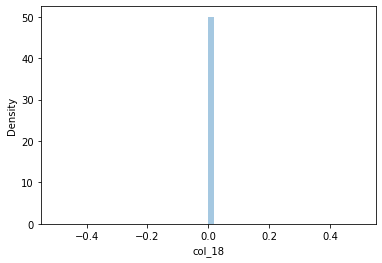

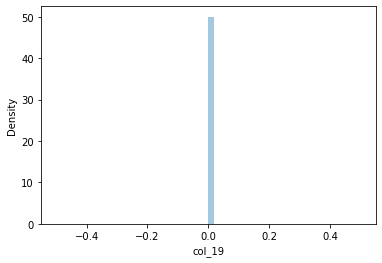

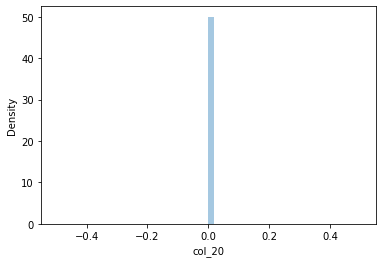

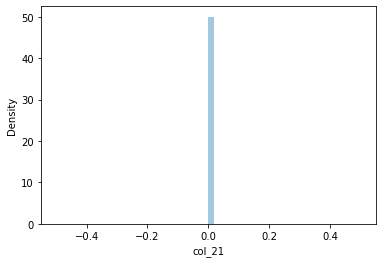

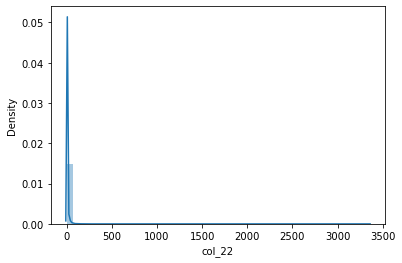

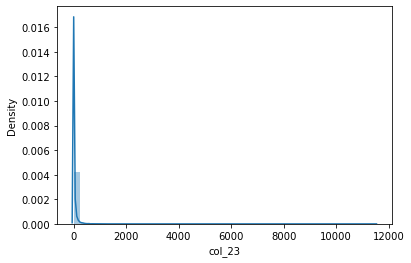

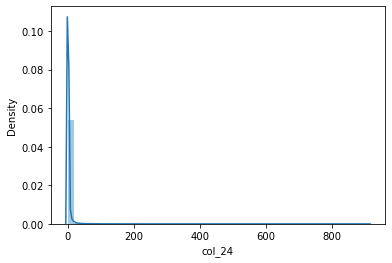

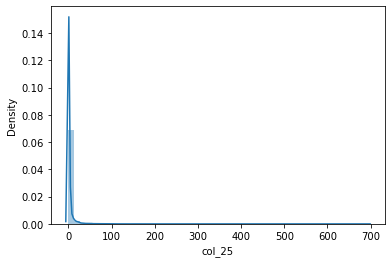

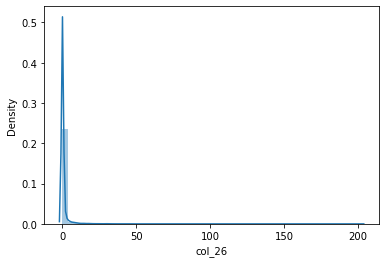

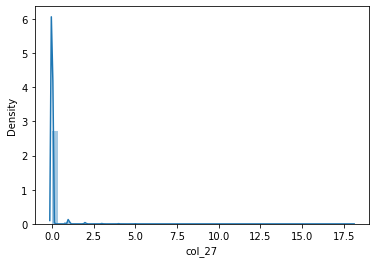

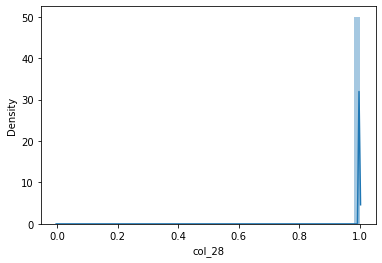

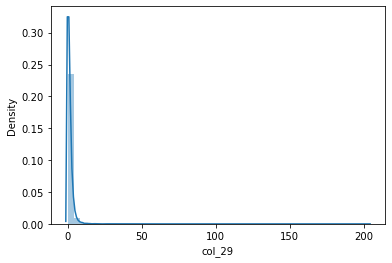

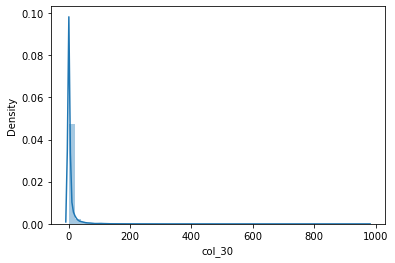

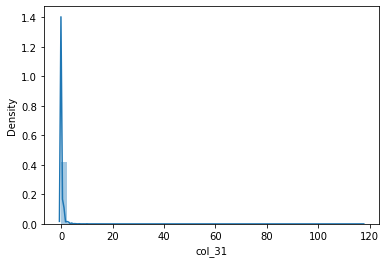

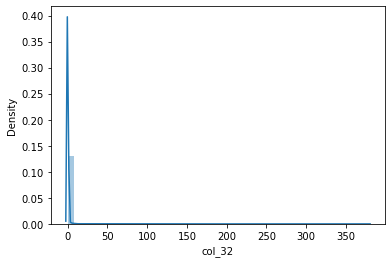

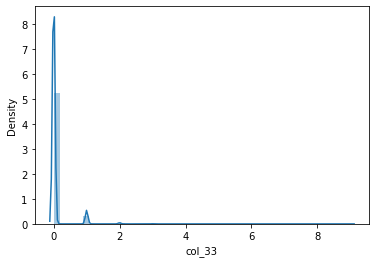

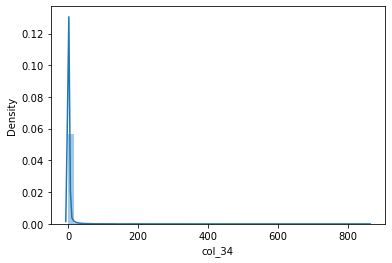

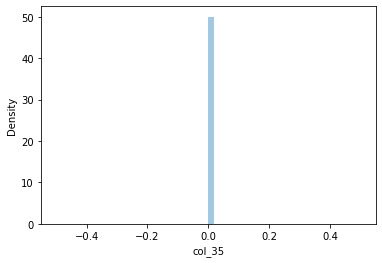

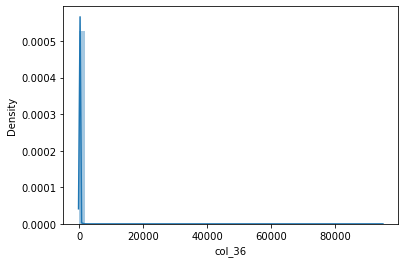

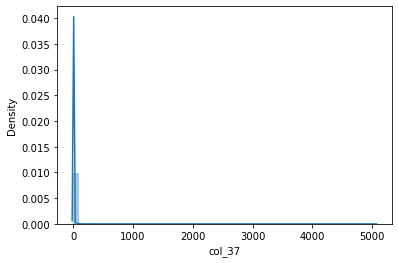

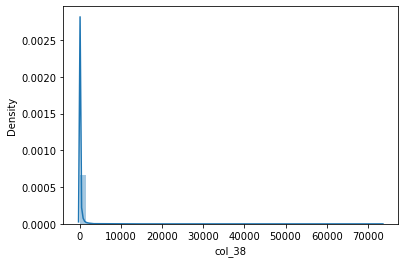

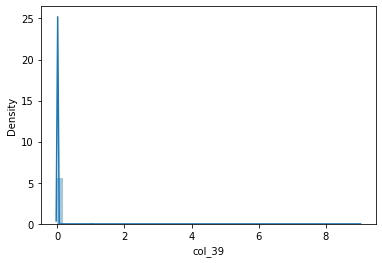

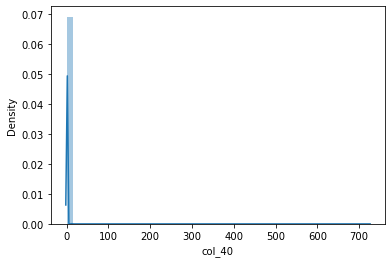

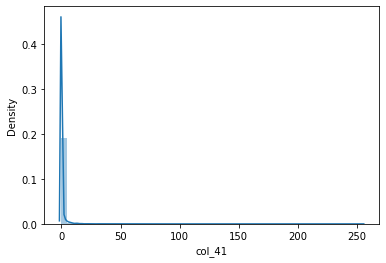

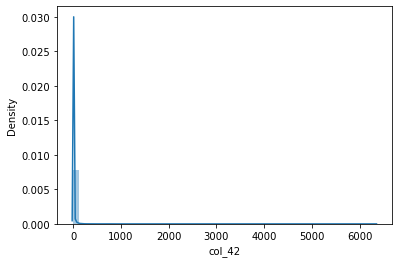

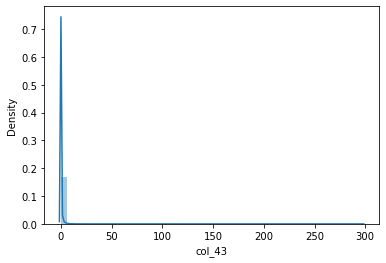

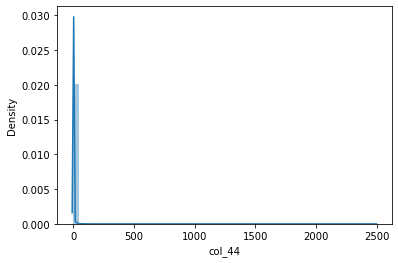

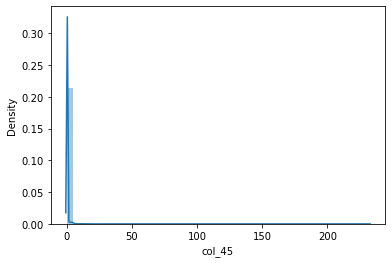

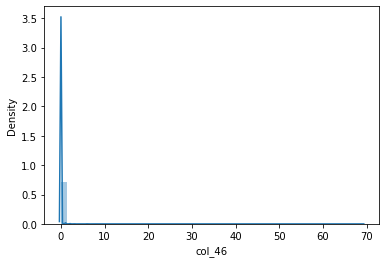

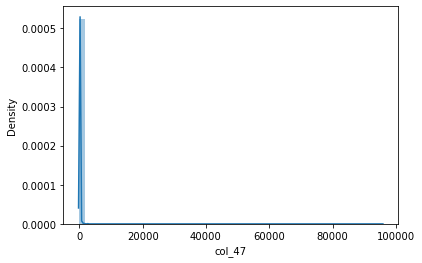

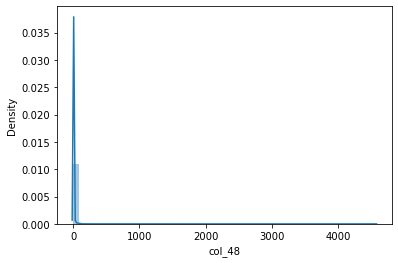

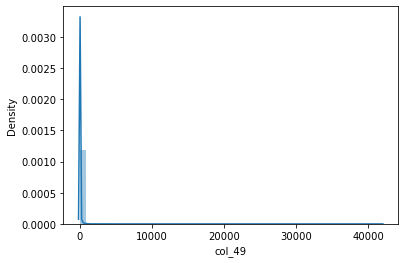

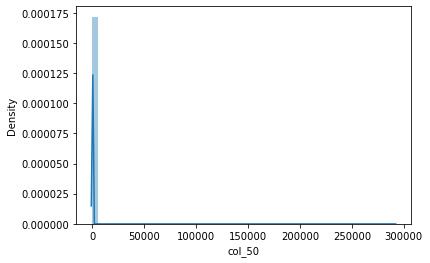

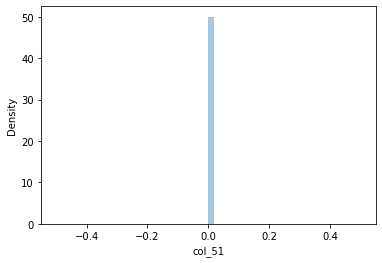

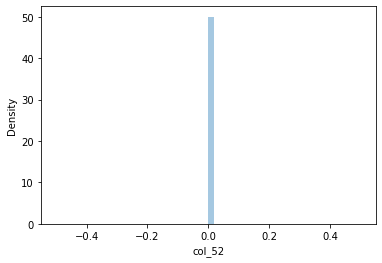

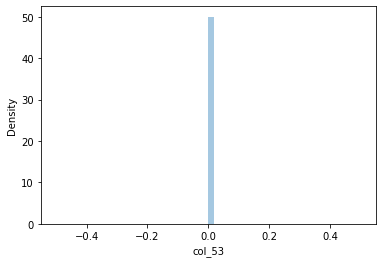

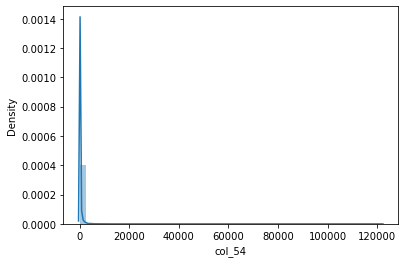

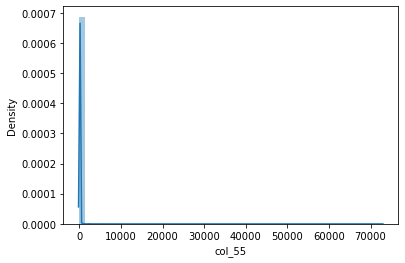

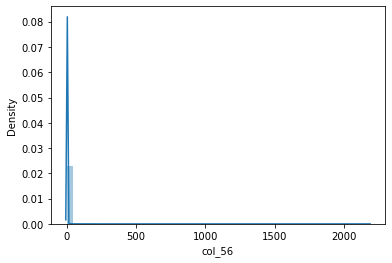

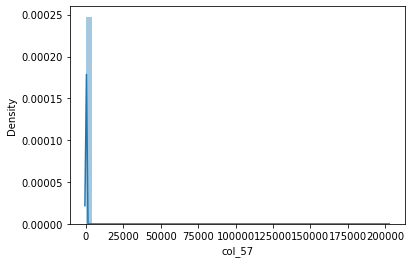

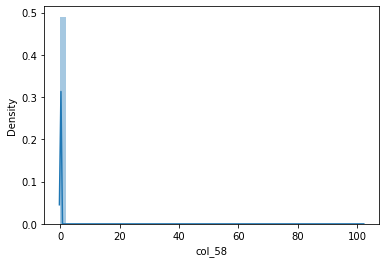

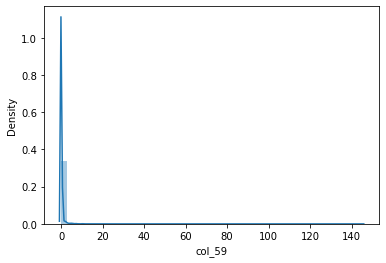

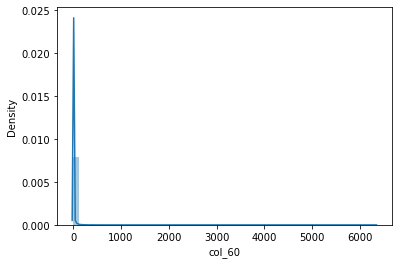

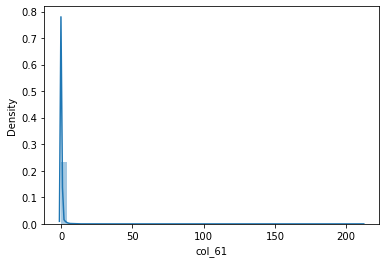

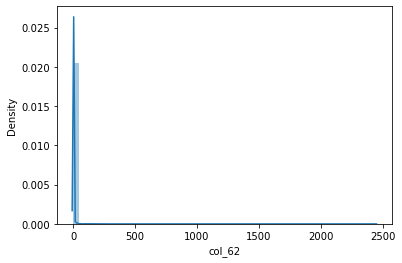

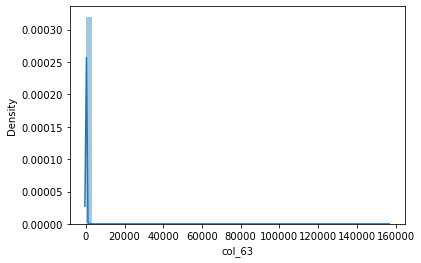

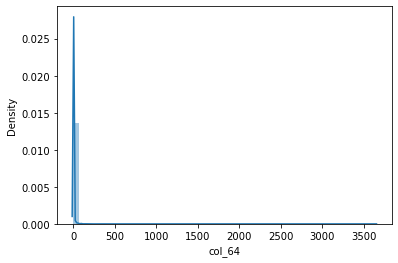

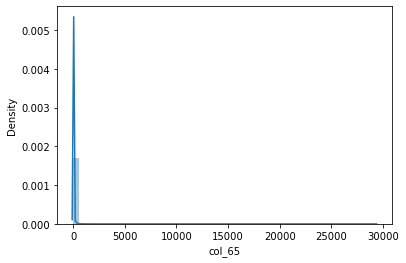

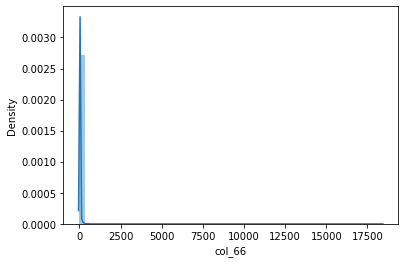

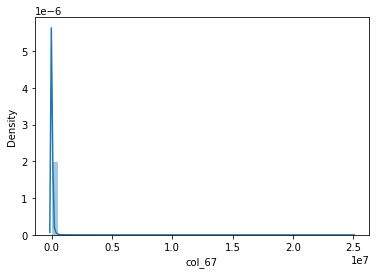

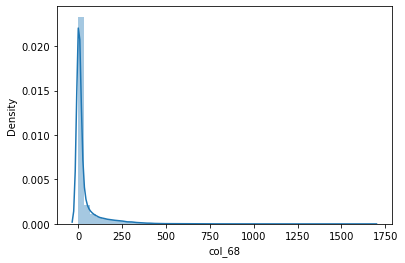

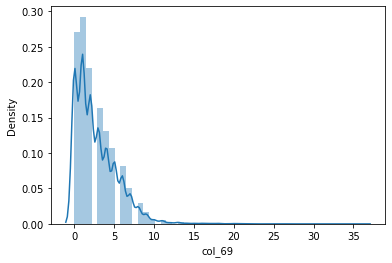

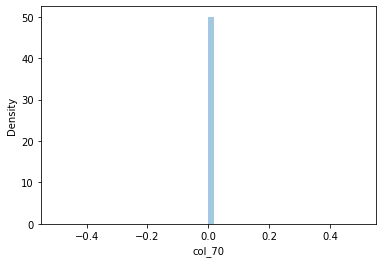

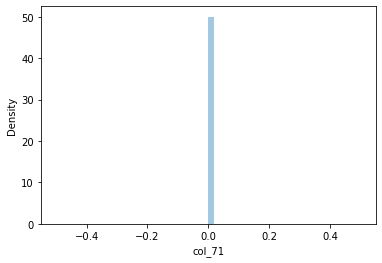

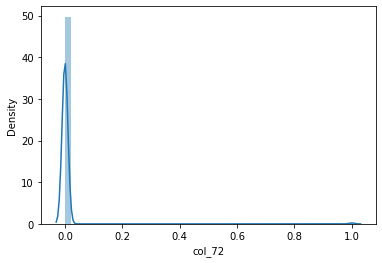

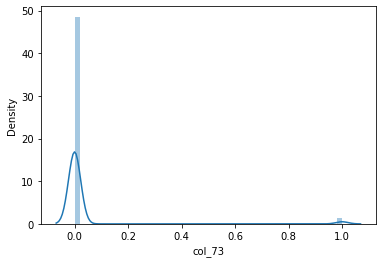

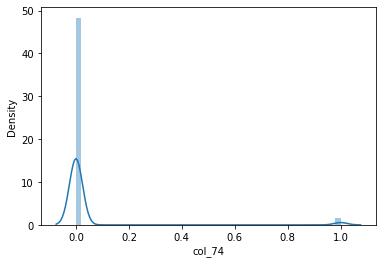

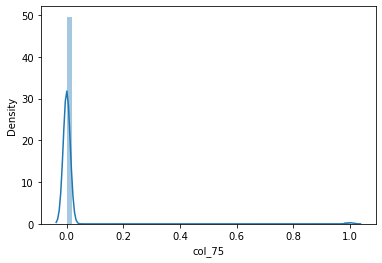

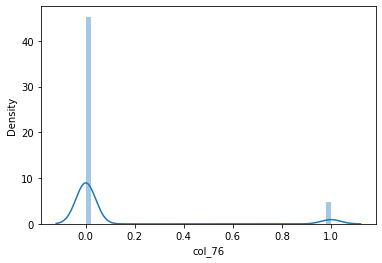

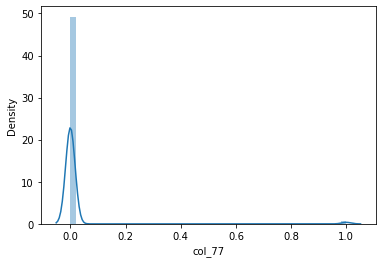

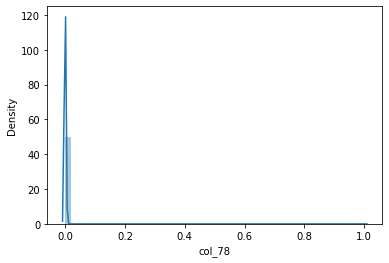

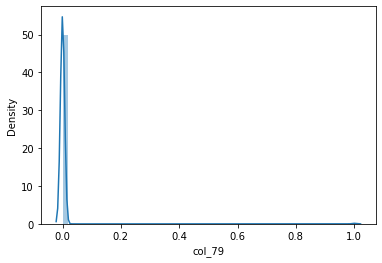

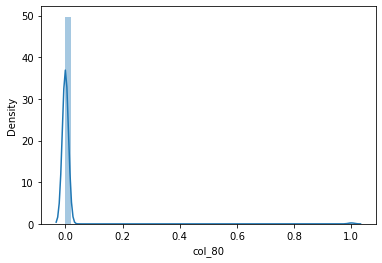

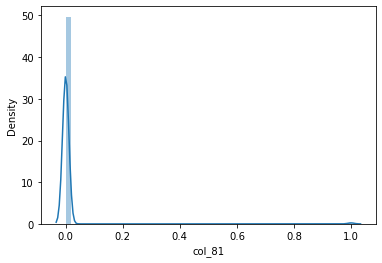

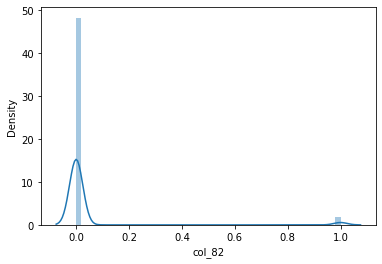

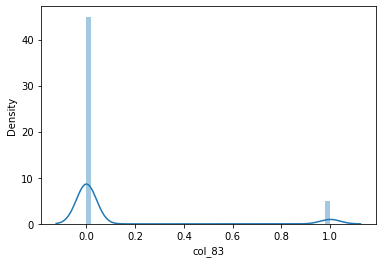

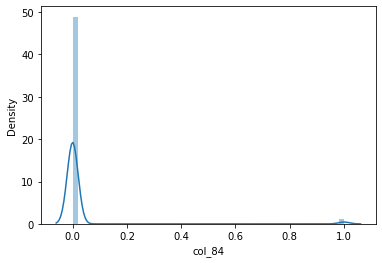

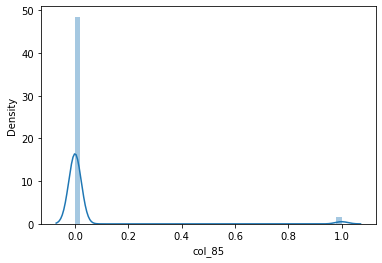

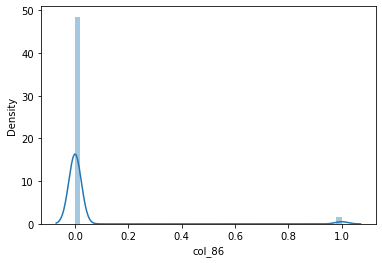

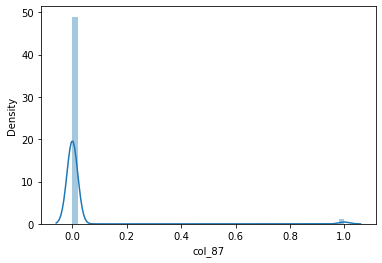

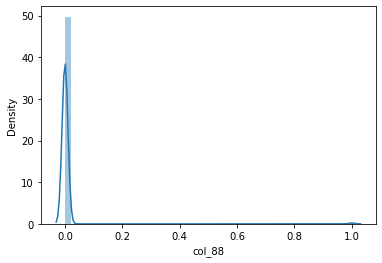

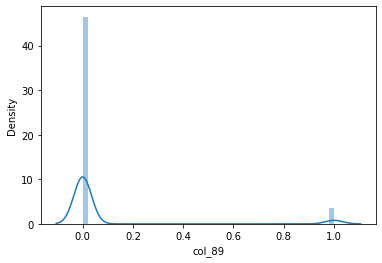

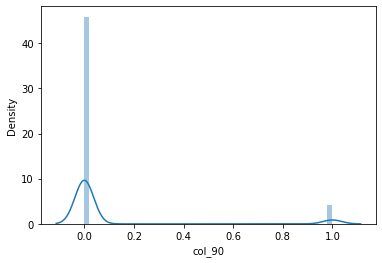

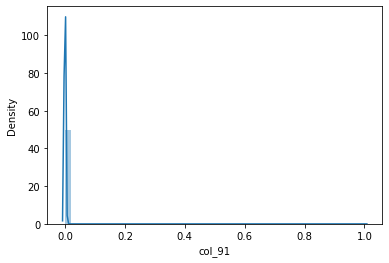

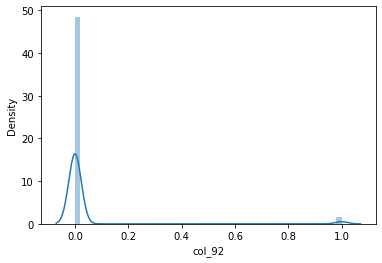

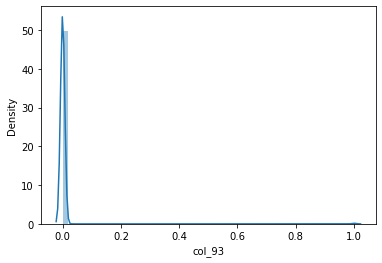

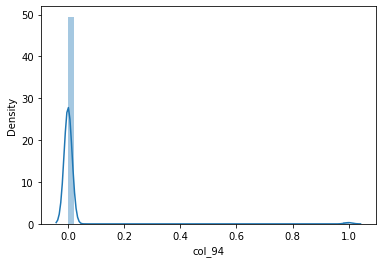

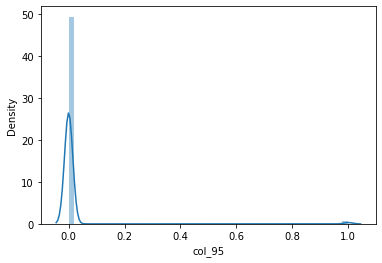

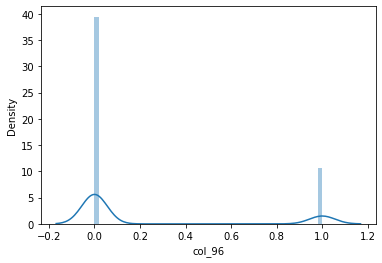

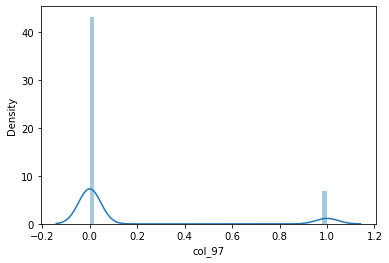

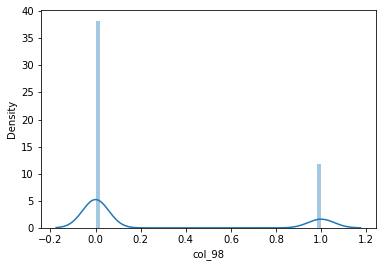

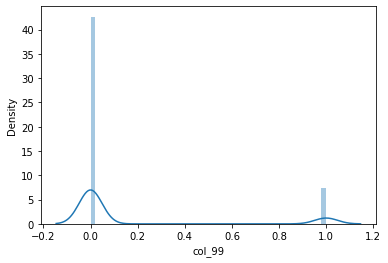

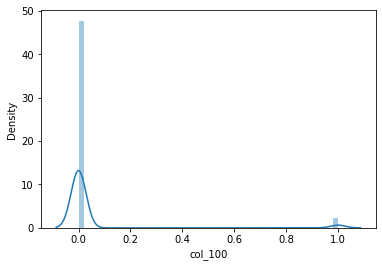

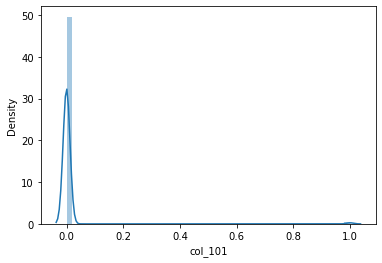

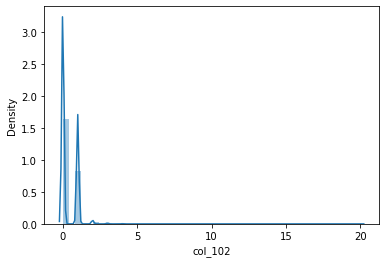

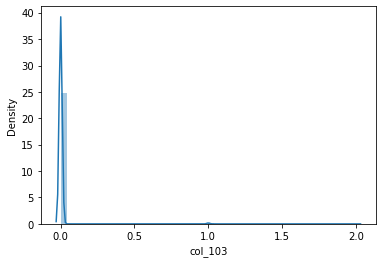

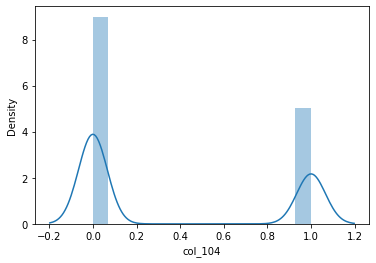

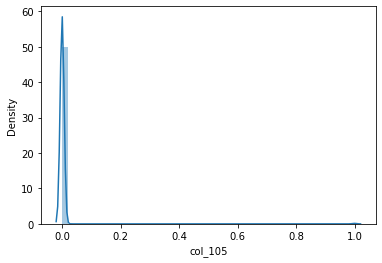

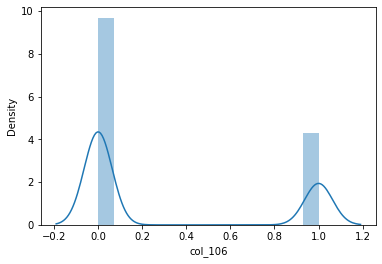

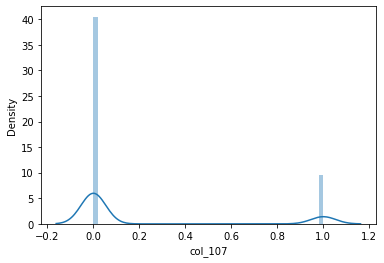

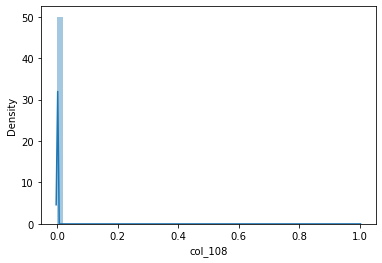

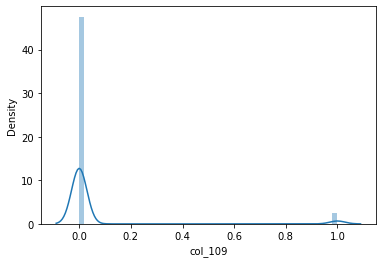

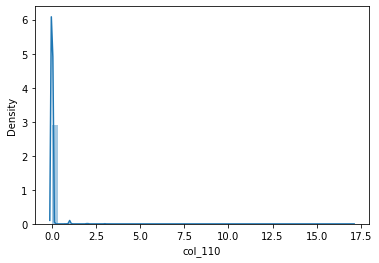

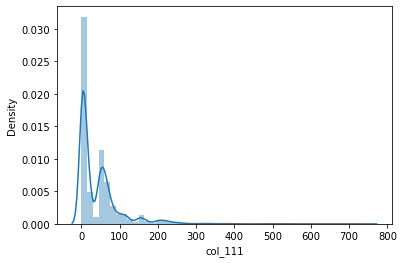

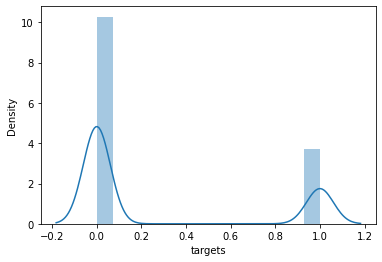

In [83]:
# Histograms of all variaables

for col in df.columns :
    plt.figure()
    sns.distplot(df[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function f

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

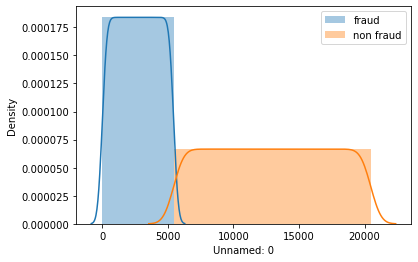

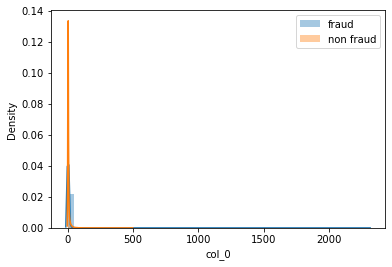

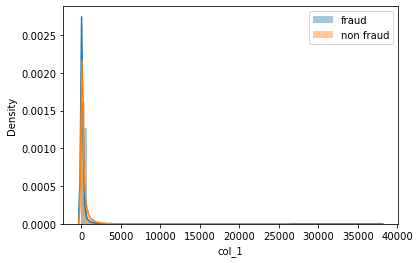

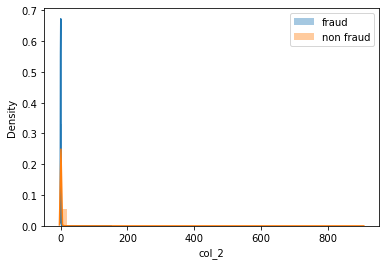

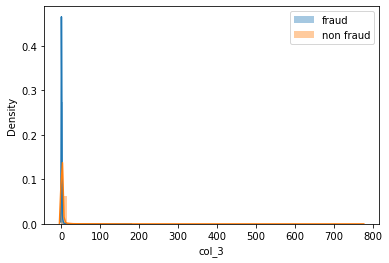

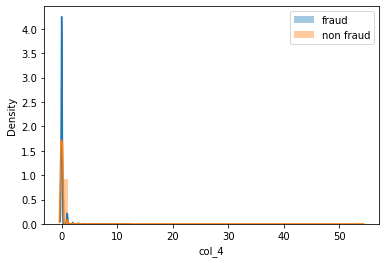

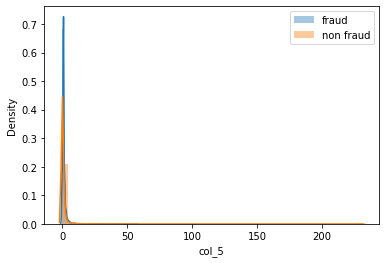

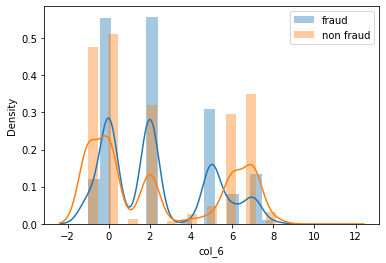

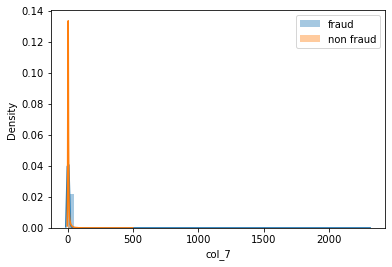

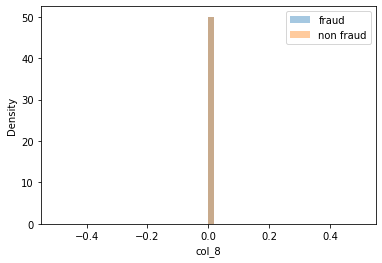

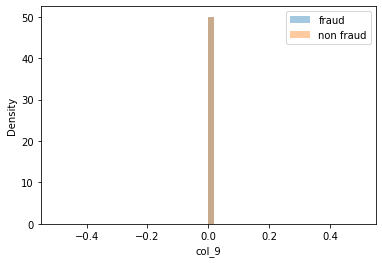

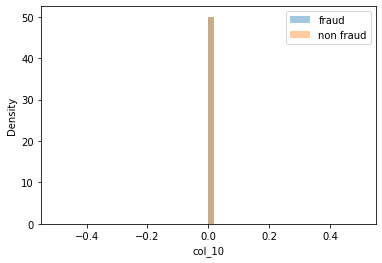

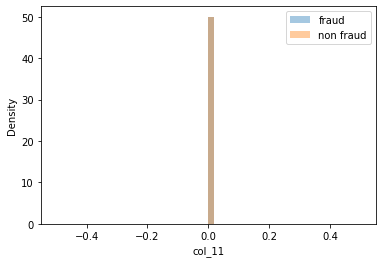

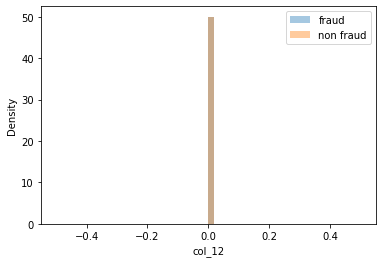

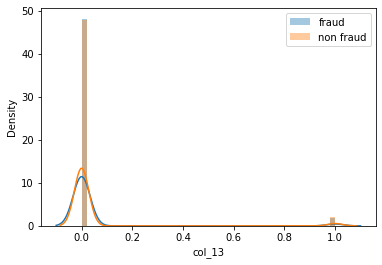

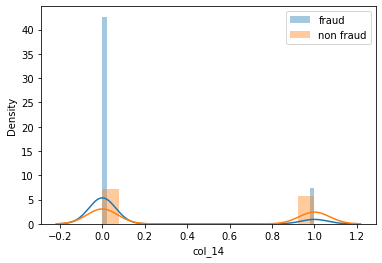

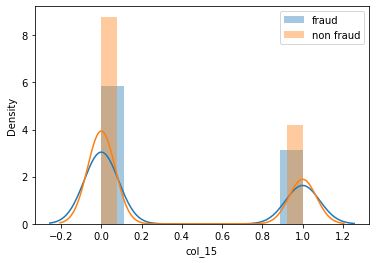

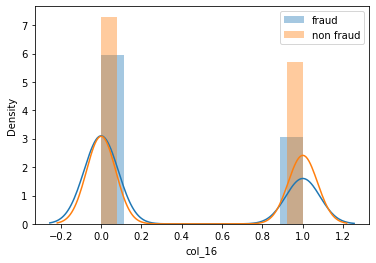

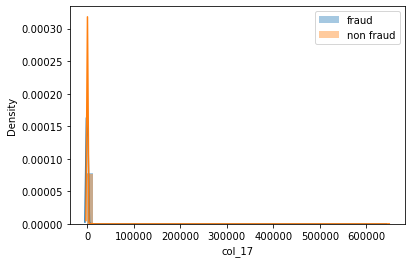

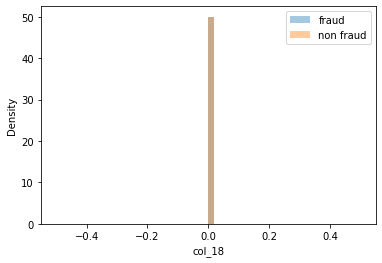

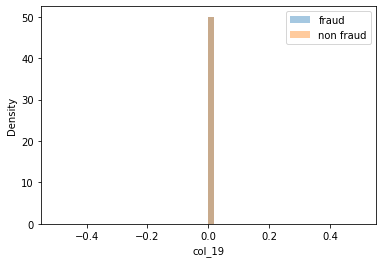

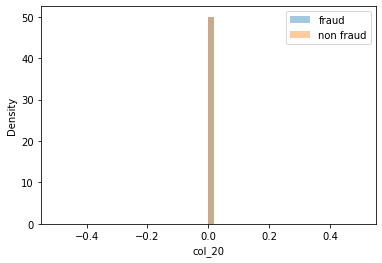

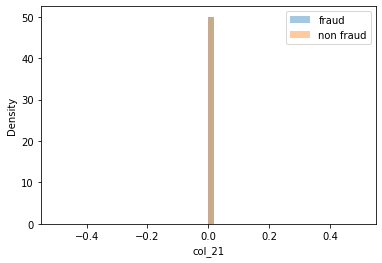

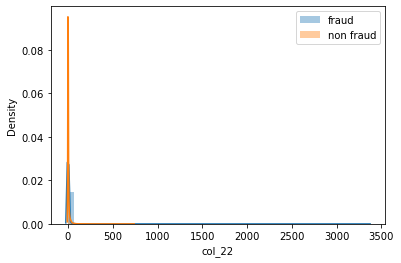

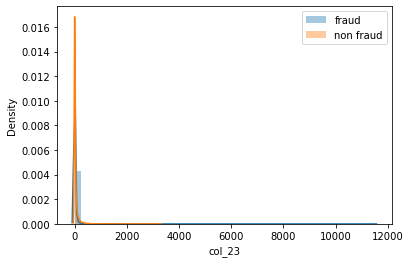

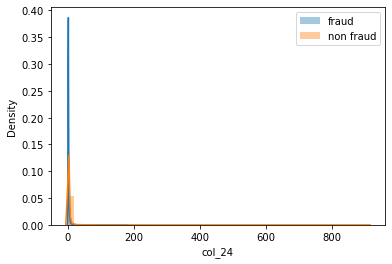

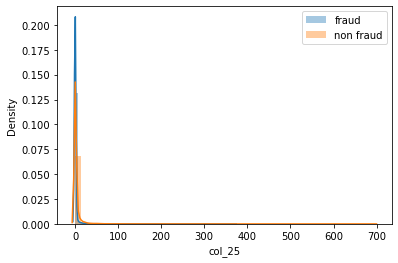

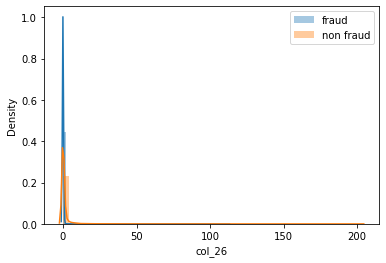

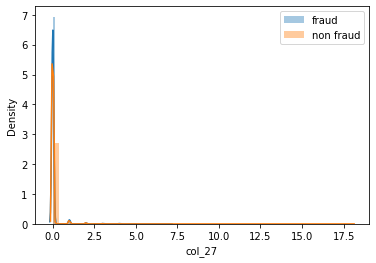

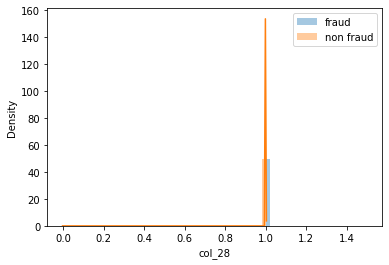

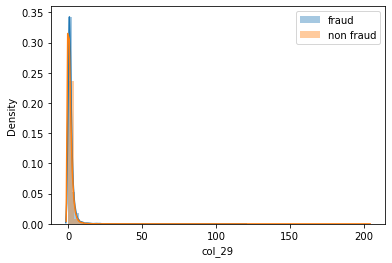

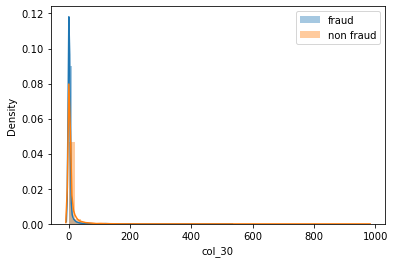

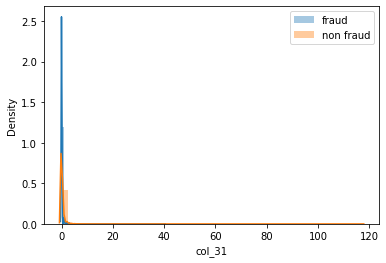

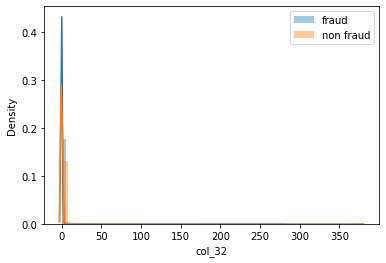

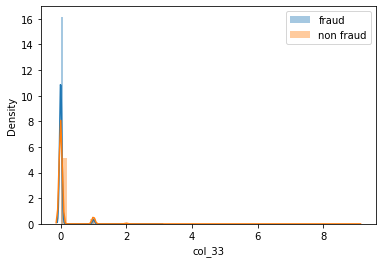

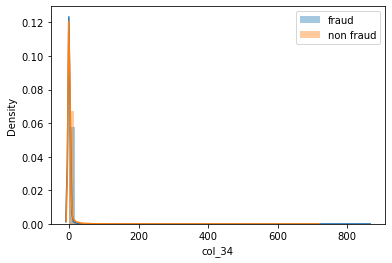

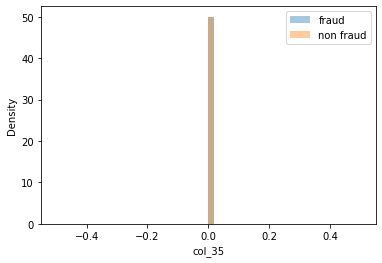

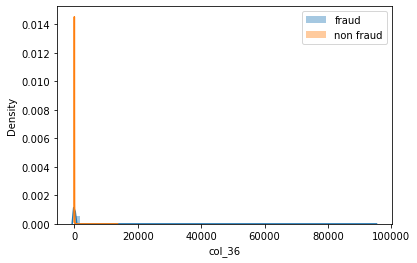

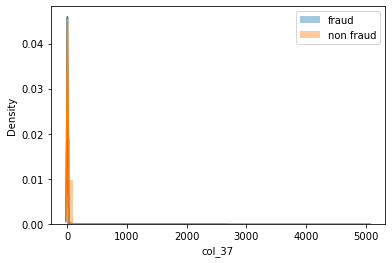

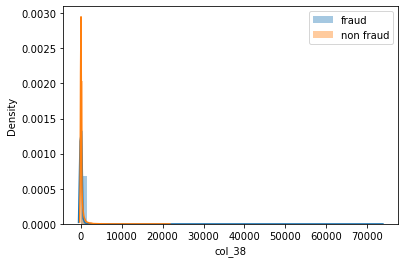

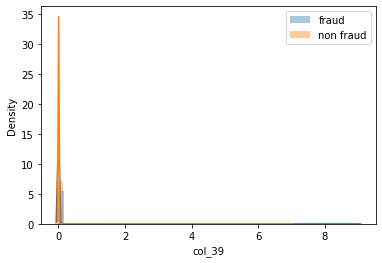

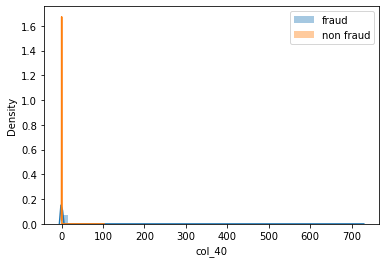

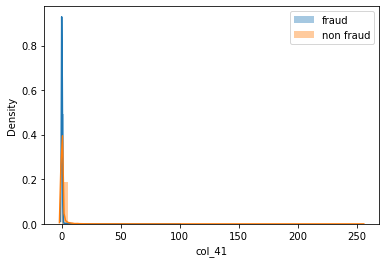

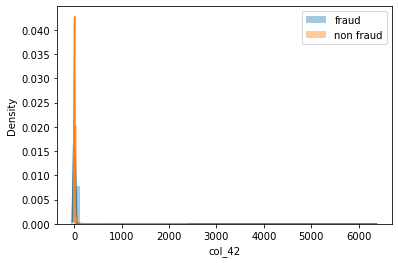

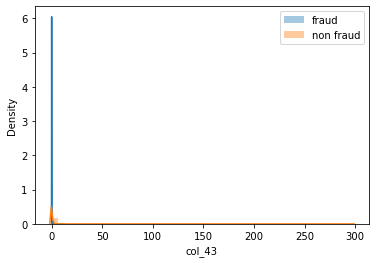

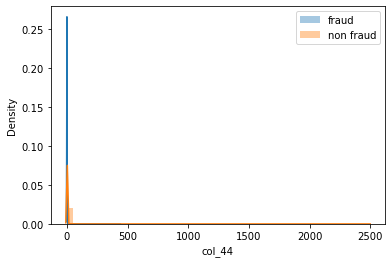

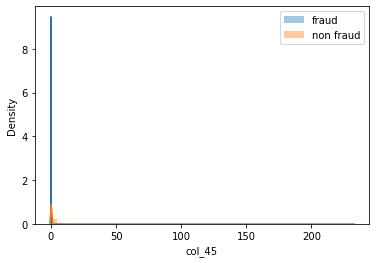

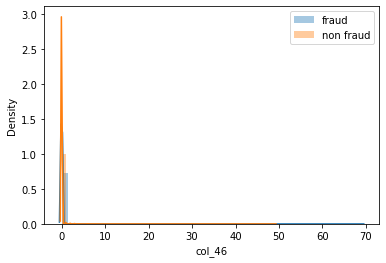

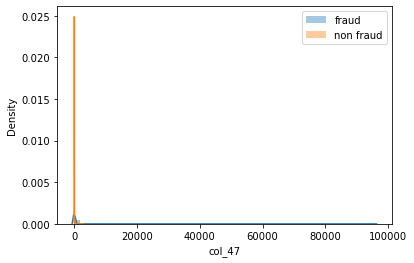

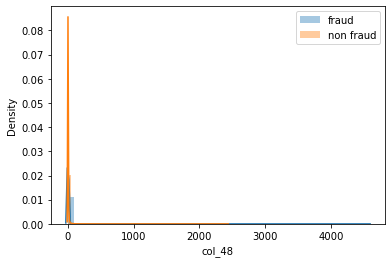

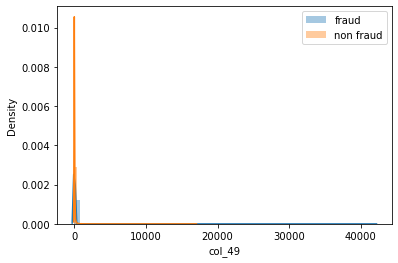

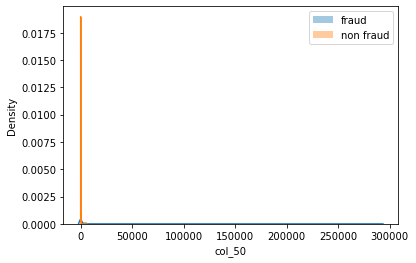

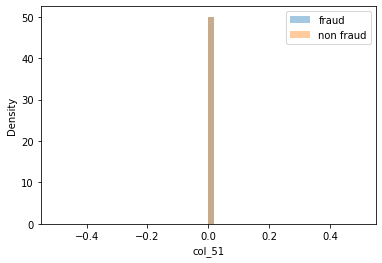

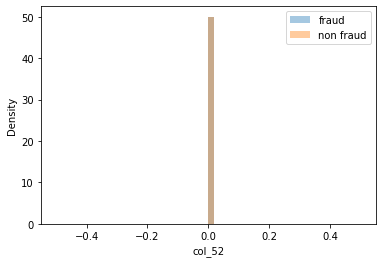

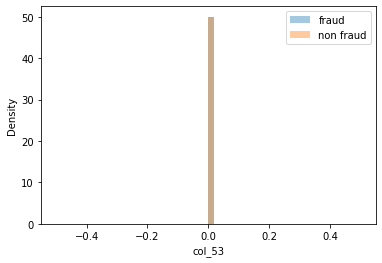

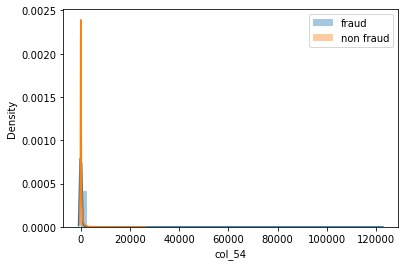

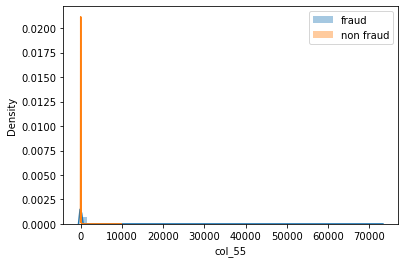

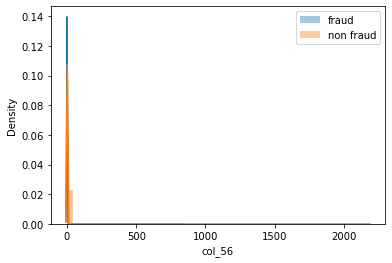

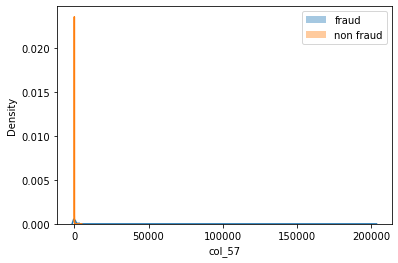

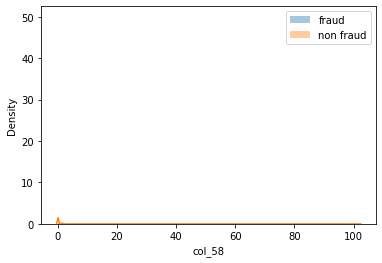

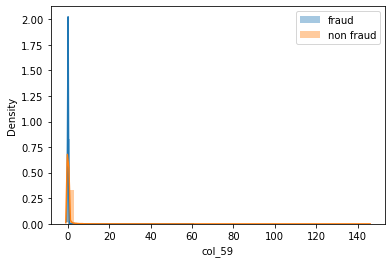

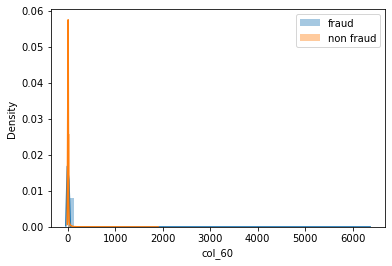

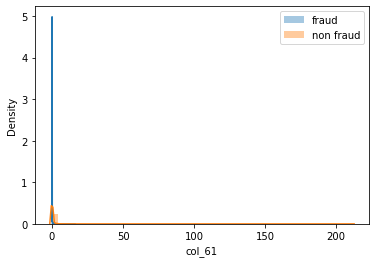

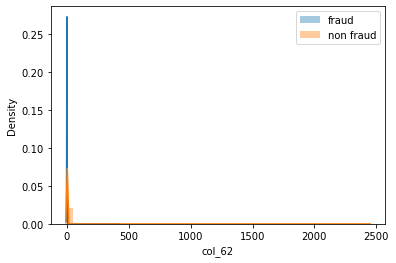

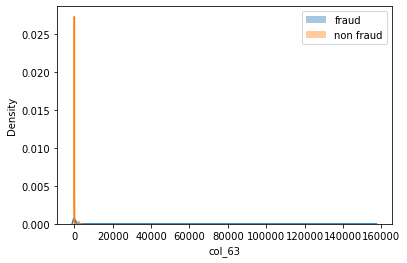

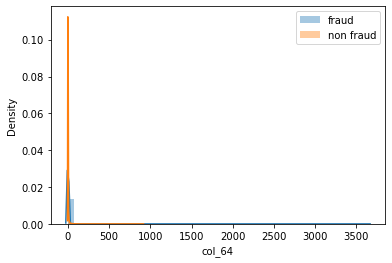

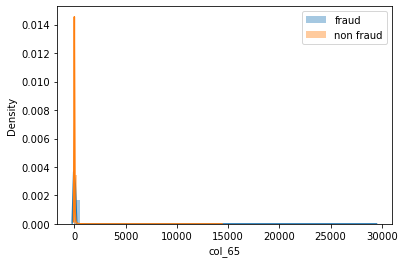

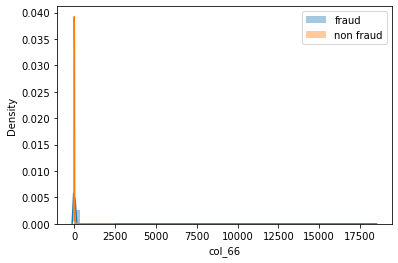

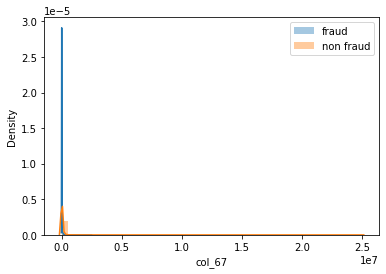

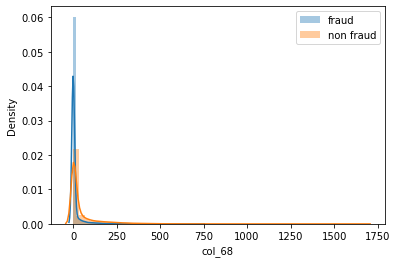

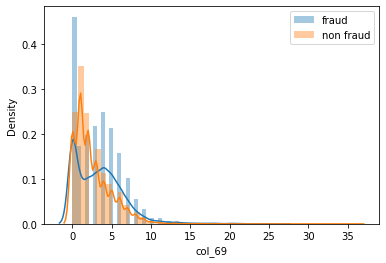

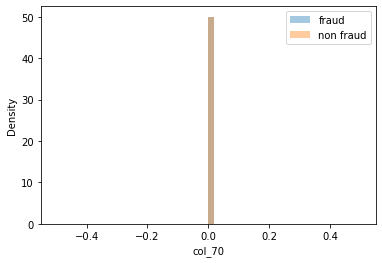

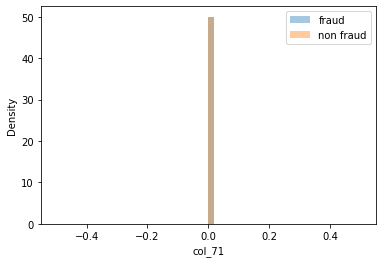

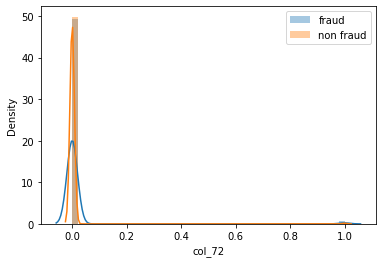

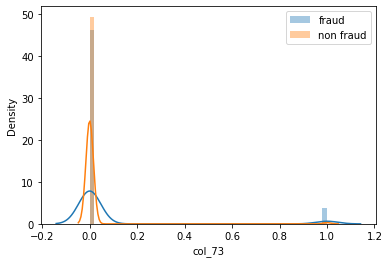

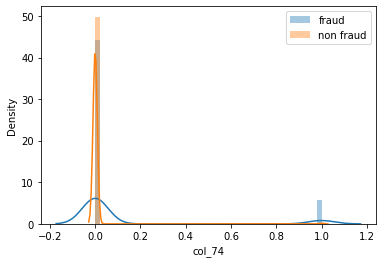

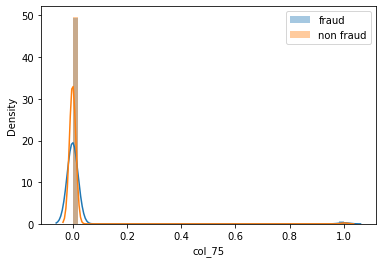

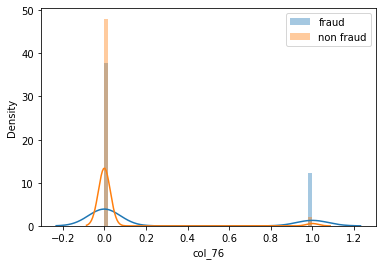

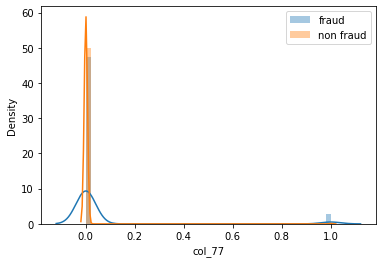

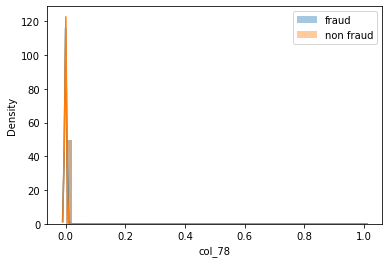

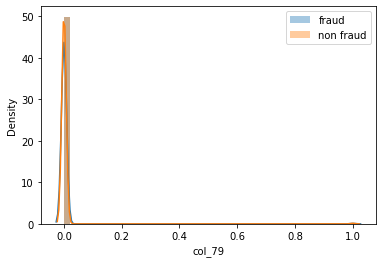

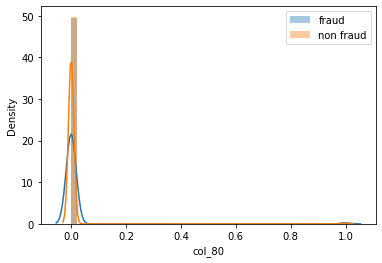

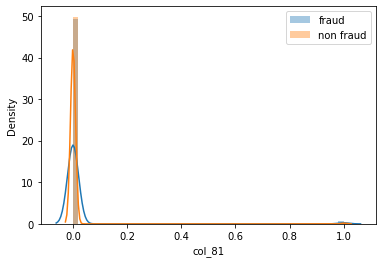

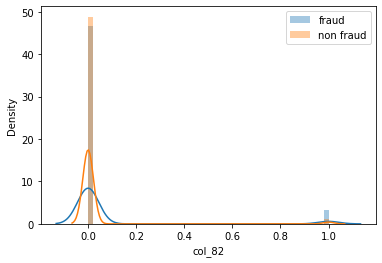

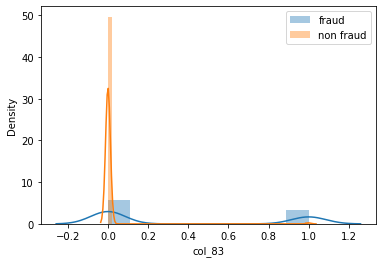

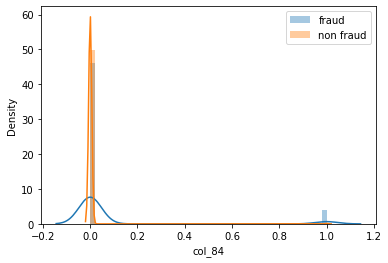

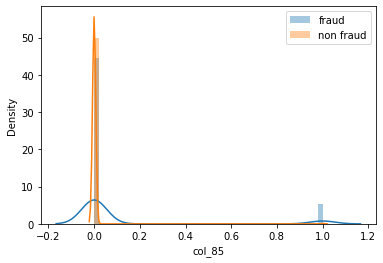

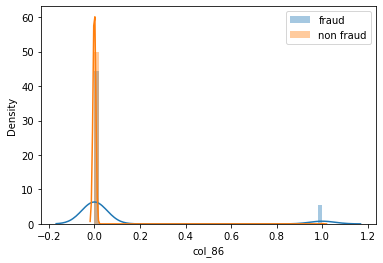

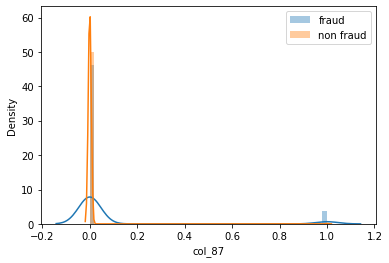

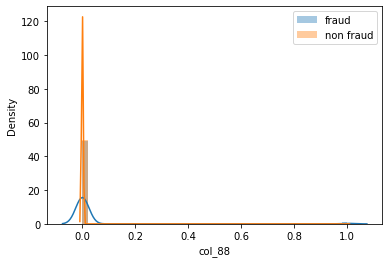

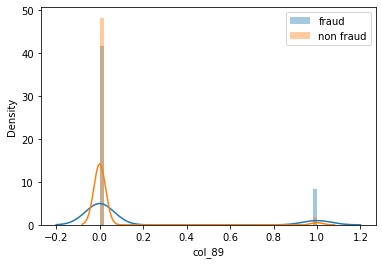

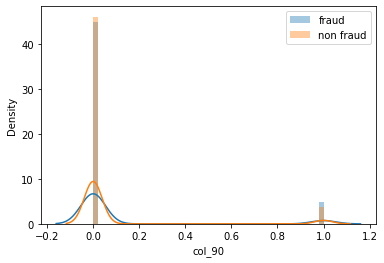

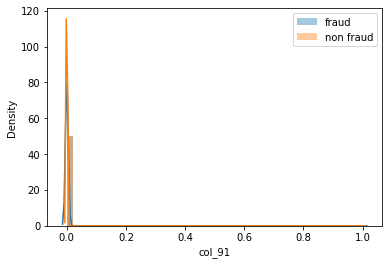

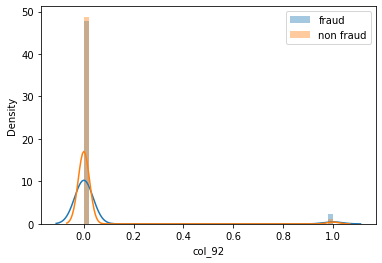

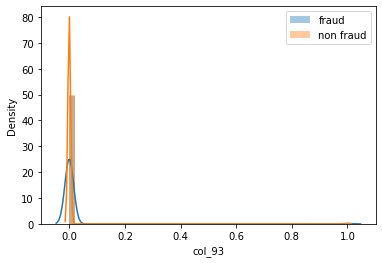

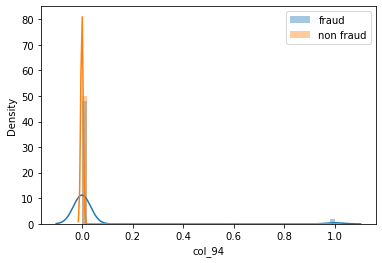

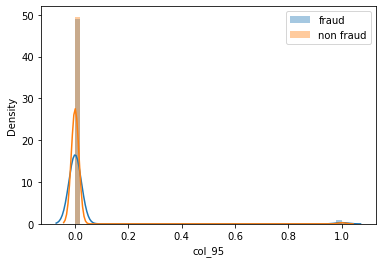

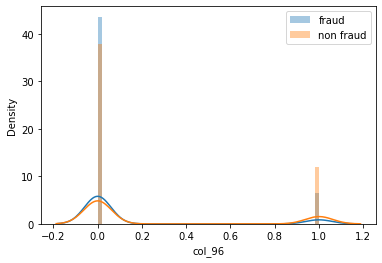

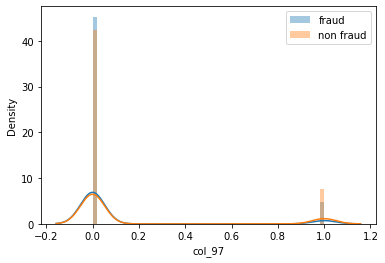

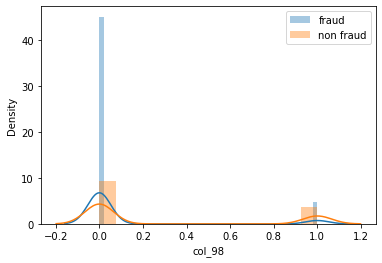

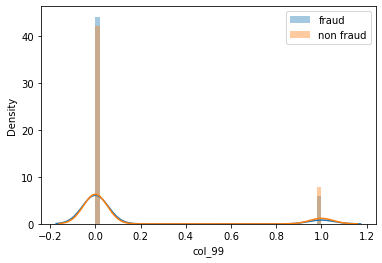

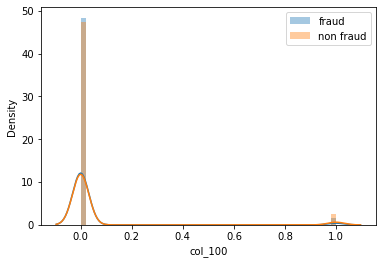

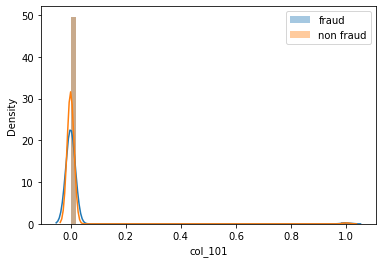

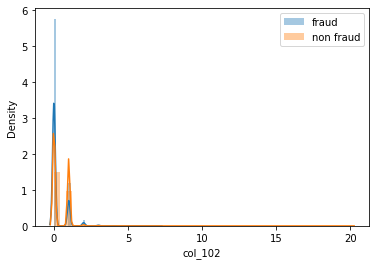

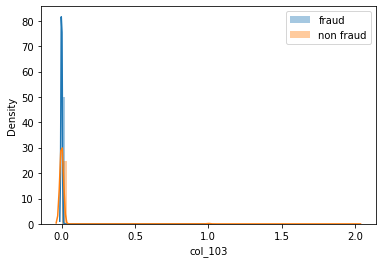

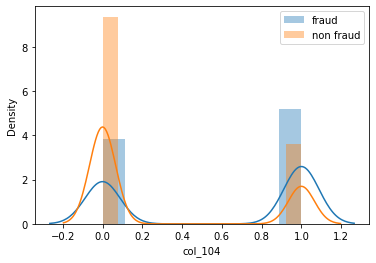

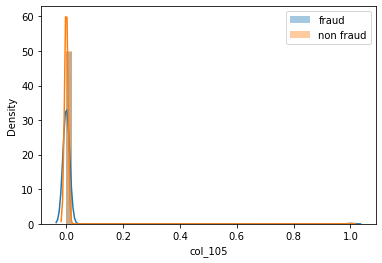

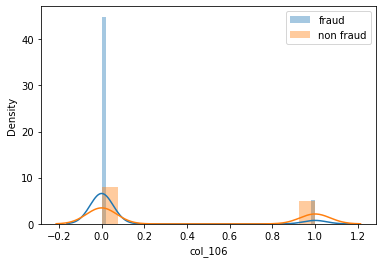

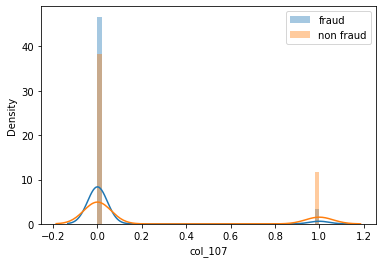

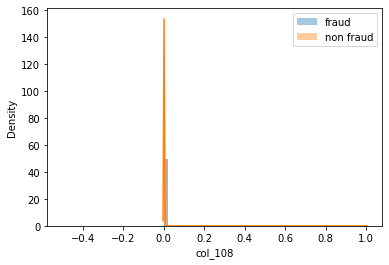

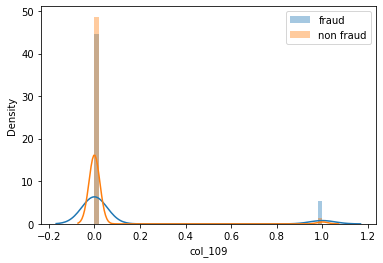

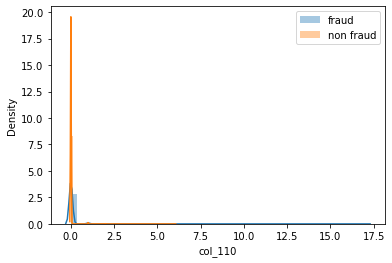

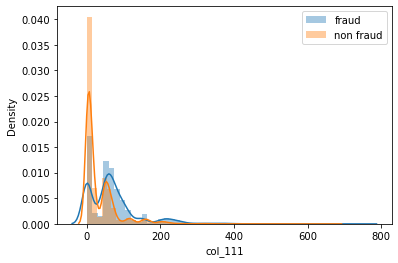

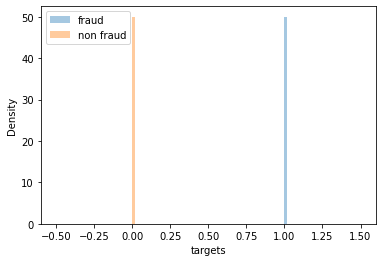

In [86]:
# Histograms of features wtith regard to the fraud and non fraud target

for col in df.columns : 
    plt.figure()
    sns.distplot(fraud[col],label = 'fraud' )
    sns.distplot(non_fraud[col], label = 'non fraud')
    plt.legend()

##### Bulk of fraud transactions 



In [ ]:
bulk_fraud = fraud_trans[fraud_trans.col_67 <100]
sns.histplot(bulk_fraud.col_67, bins = 50 )
len(bulk_fraud.col_67 ) / len(fraud_trans.col_67 )

More than 93% of fraudulent tranactions have col_67 < 25000

##### Focus on col_1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='col_1', ylabel='Density'>

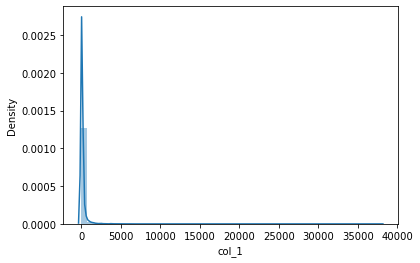

In [28]:
#

sns.distplot(fraud_trans.col_1,bins=50)

<AxesSubplot:xlabel='col_1', ylabel='Count'>

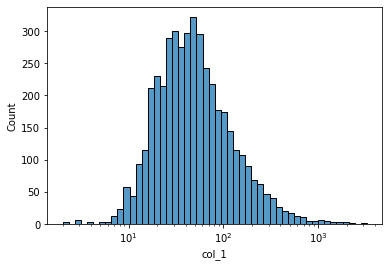

In [75]:
sns.histplot(bulk_fraud.col_1, bins = 50, log_scale=True )

In [32]:
len(bulk_fraud_1.col_1 ) / len(fraud_trans.col_1 )

0.9987127620448695

Si Col_A est le montant de la transaction, alors que 99% des transactions ont un montant inférieur à 5000.

##### Let's separate binary data from non binary data

In [12]:
# Put all unique values in a list
countunique_all = pd.DataFrame([(col, len(df[col].unique())) for col in df ])

# Create subgroups 
nonbinary = countunique_all[countunique_all[1]>2]
binary = countunique_all[countunique_all[1]==2]
unitary = countunique_all[countunique_all[1]<2]

#Conver them to list

list_binary = binary[0].values.tolist()
list_nonbinary =  nonbinary[0].values.tolist()
list_unitary =  unitary[0].values.tolist()

In [13]:
## Check that we have all the columns 
len(nonbinary) + len(binary) + len(unitary)

114

In [ ]:
##Create a sub-df with only binary columns 
for col in df_binary.columns.values:
    if col not in list_binary:
        del df_binary[col]

In [ ]:
##Create a sub-df with only nonbinary columns 
for col in df_nonbinary.columns.values:
    if col not in list_nonbinary:
        del df_nonbinary[col]



In [ ]:
##Create a sub-df with only nonbinary columns 
for col in df_unitary.columns.values:
    if col not in list_unitary:
        del df_unitary[col]

In [ ]:
len(binary[0])

In [ ]:
df_nonbinary.hist(bins=30, figsize=(60, 30))

Columns that seem to contain relevant data
col_111
Col_68, 69, 102

In [14]:
countunique = [(col, len(fraud_trans[col].unique())) for col in fraud_trans ]
countunique_df = pd.DataFrame(countunique)
countunique_df 

NameError: name 'fraud_trans' is not defined

In [7]:
nonbinary = countunique_df[countunique_df[1]>2]
binary = countunique_df[countunique_df[1]==2]

NameError: name 'countunique_df' is not defined

In [ ]:
##sns.distplot(df_nonbinary,bins=50)

plt.hist(df_nonbinary, bins=30)
plt.xscale('log')
plt.show()

<ipython-input-116-93336cc9809a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


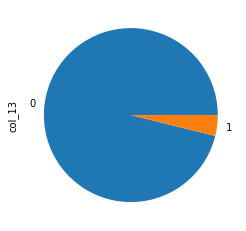

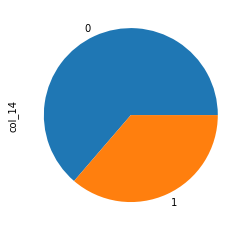

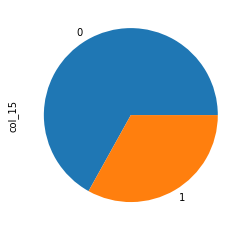

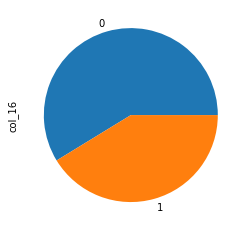

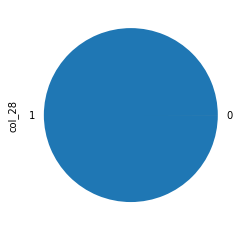

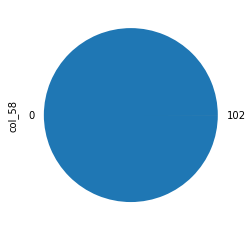

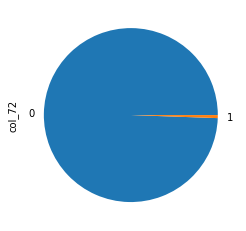

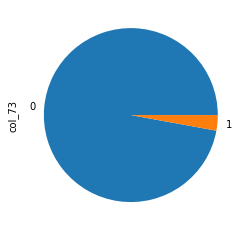

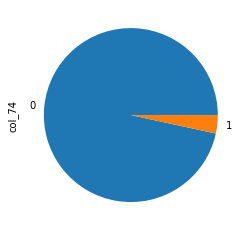

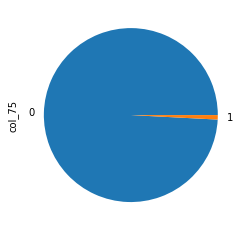

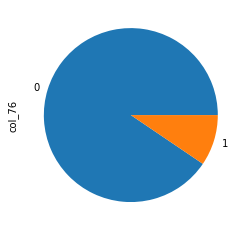

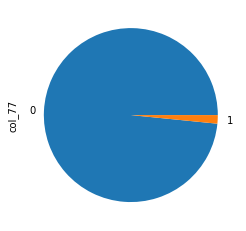

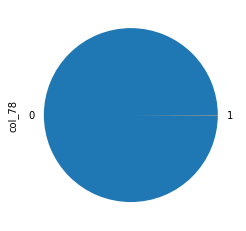

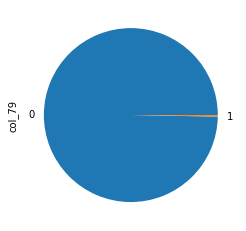

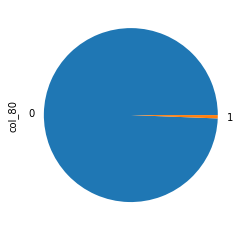

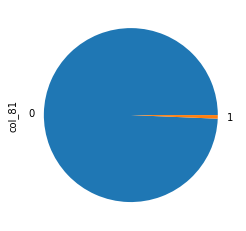

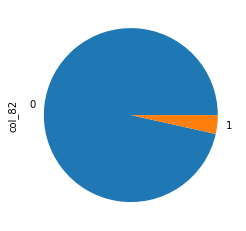

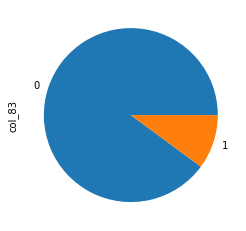

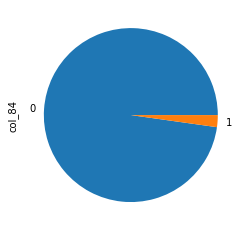

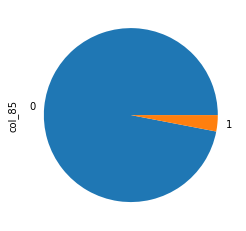

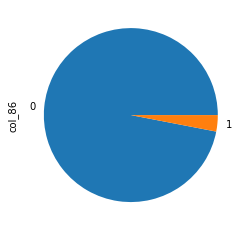

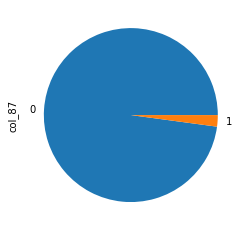

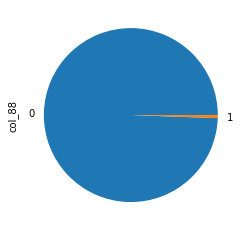

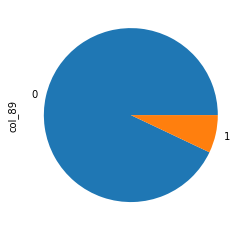

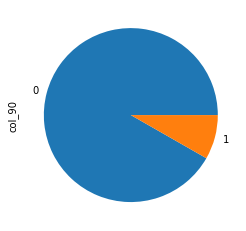

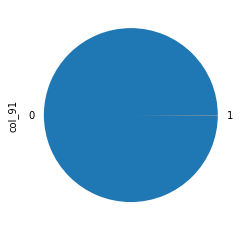

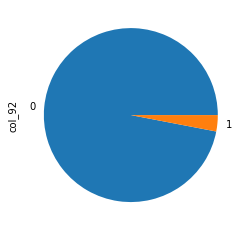

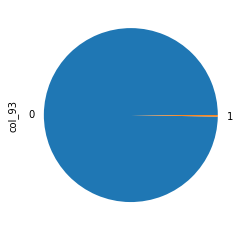

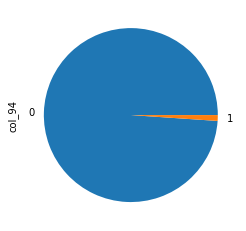

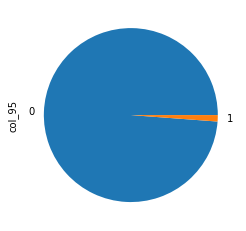

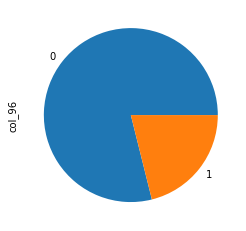

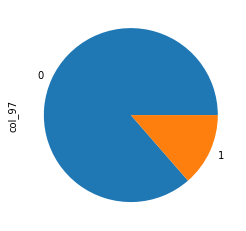

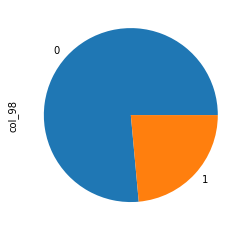

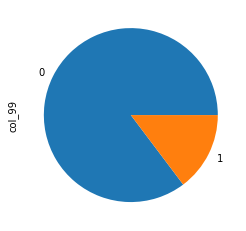

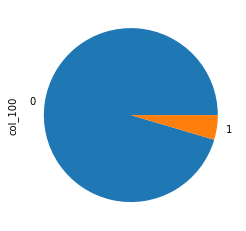

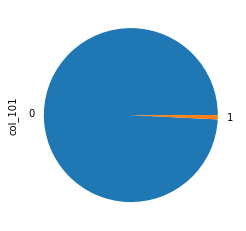

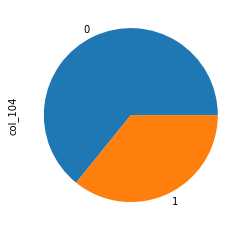

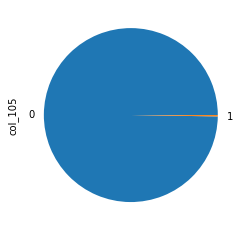

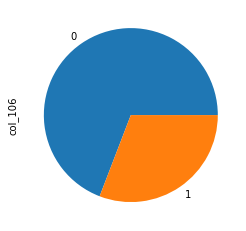

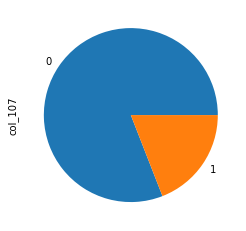

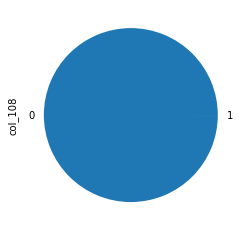

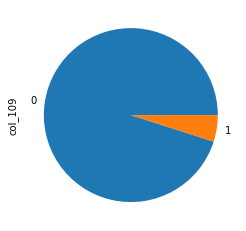

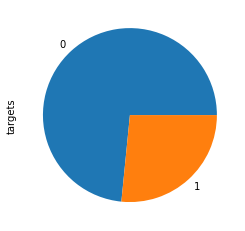

In [116]:
# Visualize data with 2 values

for col in list_binary:
    plt.figure()
    df[col].value_counts().plot.pie()

In [138]:
l= []
for col in list_binary :
    if df_clean[col].value_counts(normalize = True).min() > 0.25 :
        l.append(col)

In [139]:
l

['col_14', 'col_15', 'col_16', 'col_104', 'col_106', 'targets']

In [ ]:
Les colonnes col_14, col_16, col_104 et col_106

In [135]:
#df_clean.col_109.value_counts()

df_clean['col_1'].value_counts(normalize = True).min()

4.885675200312683e-05

# Data preprocessing

1) Balancing data : it consists of sampling same number of fraud transactions among the non fraud transactions

In [ ]:
# non_fraud = non_fraud.sample(fraud.shape[0])

# Then you should merge both data

# data = fraud.append(non_fraud, ignore_index = True)

In [98]:
list_unitary

['col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_35',
 'col_51',
 'col_52',
 'col_53',
 'col_70',
 'col_71']

In [16]:
# define a function which can drop all values having only one value

def drop_unique (df) :
    l = []
    for col in df.columns : 
        if len(df[col].unique()) <2 : 
            l.append(col)
            
    df = df.drop(l, axis = 1) 
    return df
    
# Copy data
df_clean = df.copy()

# Drop all columns with only one value

df_clean.drop(list_unitary, axis = 1,  inplace = True)
    

In [66]:
df_clean.drop("Unnamed: 0",axis = 1, inplace = True)

# Modeling

## Create a basic classifier

In [17]:
def evaluation (model,x,y ) :
    model.fit(x, y)
    y_pred = model.predict(x_valid)
    #f1 = f1_score(y_valid, y_pred )
    #print(f1)
    print(classification_report(y_valid,y_pred))
    return  

In [18]:
def prepare_data (df):
    x = cdf.drop('targets',axis = 1)
    y = cdf['targets']


    # Generate train and test sets 
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)
    return x_train, x_valid, y_train, y_valid

In [19]:
# A tree base classifier to identify important features 

cdf = df_clean.copy()

x_train, x_valid, y_train, y_valid = prepare_data(cdf)

rfc = RandomForestClassifier()

evaluation (rfc,x_train, y_train)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3033
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      4094
   macro avg       1.00      1.00      1.00      4094
weighted avg       1.00      1.00      1.00      4094



In [20]:
x_ = cdf.drop('targets',axis = 1).values
y_ = cdf['targets'].values
param_range = np.arange(1, 10)
train_scores, test_scores = validation_curve(rfc, x_, y_, param_name = "max_depth", param_range = param_range)
print(test_scores)
print(np.mean(test_scores, axis = 1))


[[0.73424524 0.827064   0.74816805 0.77669191 0.77327144]
 [0.87835857 0.8678554  0.85979482 0.88565844 0.81822624]
 [0.88422081 0.94382022 0.93869077 0.94038602 0.86586856]
 [0.89765511 0.96824621 0.97191011 0.95138041 0.8863914 ]
 [0.66121153 0.99609184 0.98094773 0.98485219 0.90300513]
 [0.75134343 0.99340498 0.98974108 0.99902272 0.90715856]
 [0.69516365 0.99706888 0.99975574 1.         0.91375519]
 [0.76086957 0.9987787  0.99829018 1.         0.90349377]
 [0.64606742 1.         0.99975574 1.         0.9100904 ]]
[0.77188813 0.86197869 0.91459728 0.93511665 0.90522168 0.92813416
 0.92114869 0.93228644 0.91118271]


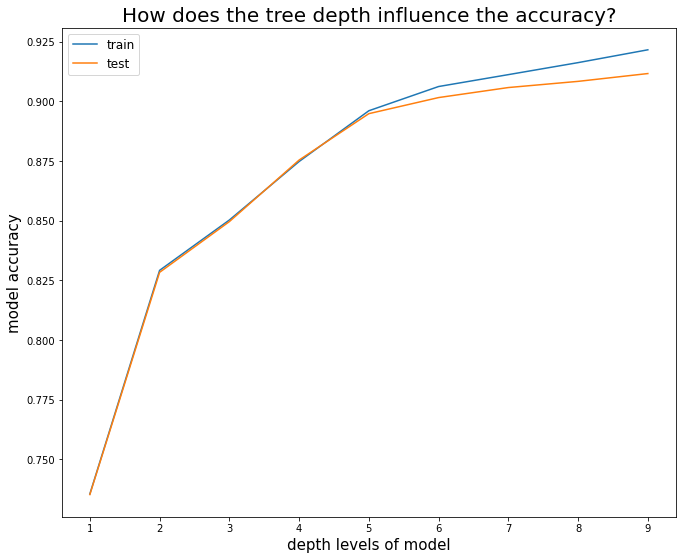

In [70]:
plt.figure(figsize = (11, 9))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

plt.title("How does the tree depth influence the accuracy?", fontsize = 20)
plt.xlabel("depth levels of model", fontsize = 15)
plt.ylabel("model accuracy", fontsize = 15)

# Adding a legend
plt.legend(["train", "test"], loc = "upper left", fontsize = 12)

plt.show()


In [24]:
# A gradient bossting classifier

cdf = df_clean.copy()

x_train, x_valid, y_train, y_valid = prepare_data(cdf)

gbc = GradientBoostingClassifier(random_state = 0)

evaluation (gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3033
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      4094
   macro avg       1.00      1.00      1.00      4094
weighted avg       1.00      1.00      1.00      4094



In [37]:
# An SVC

cdf = df_clean.copy()

x_train, x_valid, y_train, y_valid = prepare_data(cdf)

svc = make_pipeline(StandardScaler(),SVC(random_state = 0))

evaluation (svc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3033
           1       0.98      0.96      0.97      1061

    accuracy                           0.98      4094
   macro avg       0.98      0.98      0.98      4094
weighted avg       0.98      0.98      0.98      4094



In [74]:
# Logistic regression 

cdf = df_clean.copy()

x_train, x_valid, y_train, y_valid = prepare_data(cdf)

lr = make_pipeline(StandardScaler(),LogisticRegression(solver = "liblinear"))

evaluation (lr,x_train,y_train)


              precision    recall  f1-score   support

           0       0.88      0.97      0.93      3033
           1       0.89      0.63      0.74      1061

    accuracy                           0.88      4094
   macro avg       0.89      0.80      0.83      4094
weighted avg       0.88      0.88      0.88      4094



<AxesSubplot:>

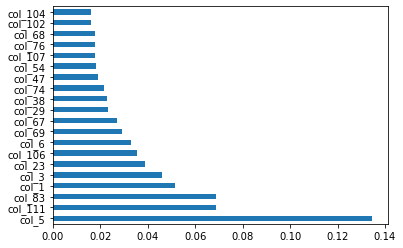

In [84]:
feat_importances = pd.Series(rfc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [21]:
# Copy data

cdf = df_clean.copy()

# Create x and y 

x = cdf.drop('targets',axis = 1)
y = cdf['targets']

# Generate train and test sets 
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Construct different grids of many models to test

## SVM
param_grid_svc = {'svc__gamma' : [1e-3, 1e-4, 1e-5, 0.0005, 1e-6], 'svc__C' : [0.1, 1, 10, 100, 1000]} 

svm = GridSearchCV(make_pipeline(StandardScaler(),SVC(random_state = 0)), param_grid = param_grid_svc, n_jobs = -1, cv = 5,  scoring = 'recall')

## Random forest

param_grid_rfc = {'n_estimators' : [80, 90, 100], 'max_depth' : [2, 4]} 
rfc = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = param_grid_rfc , cv=5)
#rfc = RandomForestClassifier(random_state = 0)


## Gradient boosting

#gbc = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid = , cv=5)
gbc = GradientBoostingClassifier(random_state = 0)


## K nearest Neighbors
knn = make_pipeline(StandardScaler(),KNeighborsClassifier())
    
pipelines = [svm, rfc, gbc, knn]

pipe_dict = {0 : 'svm', 1 : 'Random forest', 2 :'Gradient boosting', 3: 'knn'}                     
                    
#Evaluate the model 
for i, pipe in enumerate(pipelines) :
#    print("{} accuracy is {}".format(pipe_dict[i], evaluation(pipe) ))

    print('model is : {}'.format(pipe_dict[i]))
    evaluation(pipe, x_train, y_train)

model is : svm
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3033
           1       0.99      0.99      0.99      1061

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094

model is : Random forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3033
           1       1.00      0.87      0.93      1061

    accuracy                           0.97      4094
   macro avg       0.98      0.93      0.95      4094
weighted avg       0.97      0.97      0.97      4094

model is : Gradient boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3033
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      4094
   macro avg       1.00      1.00      1.00      4094
weigh